<h1><center>

# **Single-Cell RNA-seq Workshop**

<h1></center>

Welcome to the ScRNASeq workshop! In this course, we will analyze Single Cell RNA Sequencing (scRNAseq) data using R lenguage programing and the Seurat pipeline.

**Learning objectives:**
1. Understand of single-cell data structure in Seurat
2. Implement of scRNA-seq pre-processing and quality control
3. Recognize importance of data normalization
4. Perform dimensionality reduction and clustering
5. Explore automated cell annotation approaches
6. Comprehend utility of differential gene expression, application between clusters

<center>

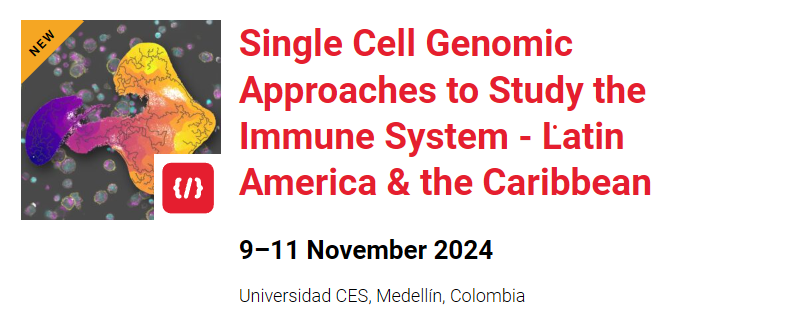

</center>

# **Setting Up the Environment in Google Colab**



## Step 1: Setting Up the R Environment in Google Colab

**Configure the Notebook to Use R**
By default, Google Colab uses Python as the programming language. We need to change it to R. Follow these steps:

1.   Click on "Runtime" in the menu bar at the top of the page.
2.   Select "Change runtime type" from the dropdown menu.
3. In the dialog that appears, click on the "Runtime type" dropdown and change it from "Python" to "R".
4. Click "Save" to apply the changes.

## Step 2: Executing Shell Commands in R



In this step, we will learn how to execute shell commands from within our R environment in Google Colab. This is particularly useful because the free version of Colab does not natively support showing shell command outputs when using the R kernel.

**Using shell_call to Execute Shell Commands**

In [ ]:
# Function to execute shell commands in Google Colab when running R kernel
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

# Function to load required packages, with warnings and messages suppressed
loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, myrequire, character.only = TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

**Setting Up R2U for Efficient Package Installation**

R2U (R to Ubuntu) provides a faster way to install R packages by leveraging the Ubuntu package manager.



In [ ]:
# Setup R2U (R to Ubuntu) for faster package installation in Colab
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check = FALSE)
shell_call("rm add_cranapt_jammy.sh")

54 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
ca-certificates is already the newest version (20240203~22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP6pBh5No4ET1MzIuDAHwl0J+mbWKPH4tIosYkcVmv

Tracing function "install.packages" in package "utils"



## Step 3: Loading and Verifying Required Packages

**Install required packages**

In [ ]:
# Define and install necessary packages from CRAN and Bioconductor
cranPkgs <- c("BiocManager", "Seurat", "cowplot", "SingleCellExperiment",
              "scDblFinder", "clustree", "tidyverse", "hdf5r")
biocPkgs <- c("celldex", "SingleR", "SeuratDisk")

In [ ]:
# Install packages from CRAN
install.packages(cranPkgs, ask = FALSE, update = TRUE, quietly = TRUE)

# Install Bioconductor packages
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}
BiocManager::install(biocPkgs)

# Install SeuratData from GitHub if not available in Bioconductor
if (!requireNamespace("devtools", quietly = TRUE)) {
  install.packages("devtools")
}
devtools::install_github('satijalab/seurat-data')

if (!requireNamespace("SeuratData", quietly = TRUE)) {
  BiocManager::install("SeuratData")
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'celldex' 'SingleR'”
Installing package(s) 'SeuratDisk'

Warning message:
“package ‘SeuratDisk’ is not available for Bioconductor version '3.19'

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Old packages: 'askpass', 'commonmark', 'credentials', 'limma', 'sys', 'xfun'

Skipping install of 'SeuratData' from a github remote, the SHA1 (4dc08e02) has not changed since last install.
  Use `force = TRUE` to force installation



**Load packages**

Now, we will ensure that all necessary R packages are loaded and ready for our scRNASeq analysis. To simplify package loading, we will use the loadPackages function. However, if you don't have this function, you can manually load each package using library(name_of_package).

In [ ]:
# Loading necessary packages
pkgs = c("Seurat", "cowplot", "SingleCellExperiment", "scDblFinder",
       "clustree","tidyverse", "celldex", "SingleR", "pheatmap",
       "devtools", "SeuratData", "hdf5r")
loadPackages(pkgs)

In [ ]:
# Checking packages
print(sort(.packages()))

 [1] "base"                 "Biobase"              "BiocGenerics"        
 [4] "celldex"              "clustree"             "cowplot"             
 [7] "datasets"             "devtools"             "dplyr"               
[10] "forcats"              "GenomeInfoDb"         "GenomicRanges"       
[13] "ggplot2"              "ggraph"               "graphics"            
[16] "grDevices"            "hdf5r"                "IRanges"             
[19] "lubridate"            "MatrixGenerics"       "matrixStats"         
[22] "methods"              "pheatmap"             "purrr"               
[25] "readr"                "S4Vectors"            "scDblFinder"         
[28] "Seurat"               "SeuratData"           "SeuratObject"        
[31] "SingleCellExperiment" "SingleR"              "sp"                  
[34] "stats"                "stats4"               "stringr"             
[37] "SummarizedExperiment" "tibble"               "tidyr"               
[40] "tidyverse"            "usethis" 

## 3.1 Description of libraries


Here are the descriptions of the key libraries we will be using:

1. BiocManager: Tool for installing and managing Bioconductor packages.
2. Seurat: Tool for the analysis and visualization of single-cell RNA-seq data.
3. cowplot: Extension of ggplot2 for creating complex plots and compositions.
4. SingleCellExperiment: Data structure for the analysis of single-cell data.
5. scDblFinder: Tool for identifying doublets in single-cell data.
8. clustree: Tool for visualizing clustering hierarchies.
9. SeuratData: Package associated with Seurat for loading and managing example datasets.
10. celldex: Annotation resources for SingleR.
11. SingleR: Tool for automated annotation of single-cell RNA-seq data.
12. scDblFinder: Used to detect doublets (cells that contain transcripts from more than one cell).
13. clustree: Designed to help users explore how clusters change across different resolutions or parameter settings in hierarchical clustering.
14. tidyverse: A collection of R packages for data science that share an underlying design philosophy, grammar, and data structures (e.g., `ggplot2`, `dplyr`, `tidyr`).
15. pheatmap: For creating heatmaps with additional features like annotation, and custom color schemes.
16. devtools: Provides tools to make the development of R packages easier, facilitating tasks like installation, testing, and package management.



# **GEO DATA**






## Loading and Exploring scRNASeq Data

**Where can we find free datasets?** There exist several pages, some examples are [Human Cell Atlas Data Portal](https://data.humancellatlas.org/), [CELLXGENE](https://cellxgene.cziscience.com/) and Gene Expression Onibus [GEO](https://www.ncbi.nlm.nih.gov/geo/). Here, we will use data that can be found in GEO.

GEO is a comprehensive public database that stores and provides free access to various types of sequencing data, such as microarray, high-throughput genomic data, and single-cell data, among others. It serves as an essential resource for researchers, offering open access to data that can complement their studies, enabling in this way the discovery of new insights into gene function, regulation and expression, while also promoting data reuse.

If you want to explore the General Portal Interface please access to the GEO website: https://www.ncbi.nlm.nih.gov/geo/

## Data Description

In this workshop, we will use the dataset found in [GEO DataSets:](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE145926) **GSE145926**, which originates from the study described in the article ["The landscape of lung bronchoalveolar immune cells in COVID-19 revealed by single-cell RNA sequencing"](https://www.medrxiv.org/content/10.1101/2020.02.23.20026690v1).

This study produced a cellular atlas of lung bronchoalveolar r immune microenvironment in COVID-19 patients at the single-cell resolution using 10x genomics technology for both single-cell RNA sequencing (scRNA-seq) and T-cell Receptor Sequencing (TCR-seq). This study characterized bronchoalveolar lavage fluid immune cells from patients with varying severity of COVID-19 disease and from healthy subjects. The results help to unveiled the potential immune mechanisms underlying disease progression and protection in COVID-19, for example, mild cases were characterized by the presence of highly expanded clonally CD8+ T cells resident in tissue, suggesting a robust adaptive immune response connected to a better control of COVID-19. The datain Geo has 21 samples that corresponds to:

- 6 Patients with Severe COVID-19
- 3 Patients with Moderate COVID-19
- 3 Healthy Controls


 SRA Run Selector [BioProject	PRJNA608742](https://www.ncbi.nlm.nih.gov/Traces/study/?acc=PRJNA608742&o=acc_s%3Aa&s=SRR11537946,SRR11537947,SRR11537948)


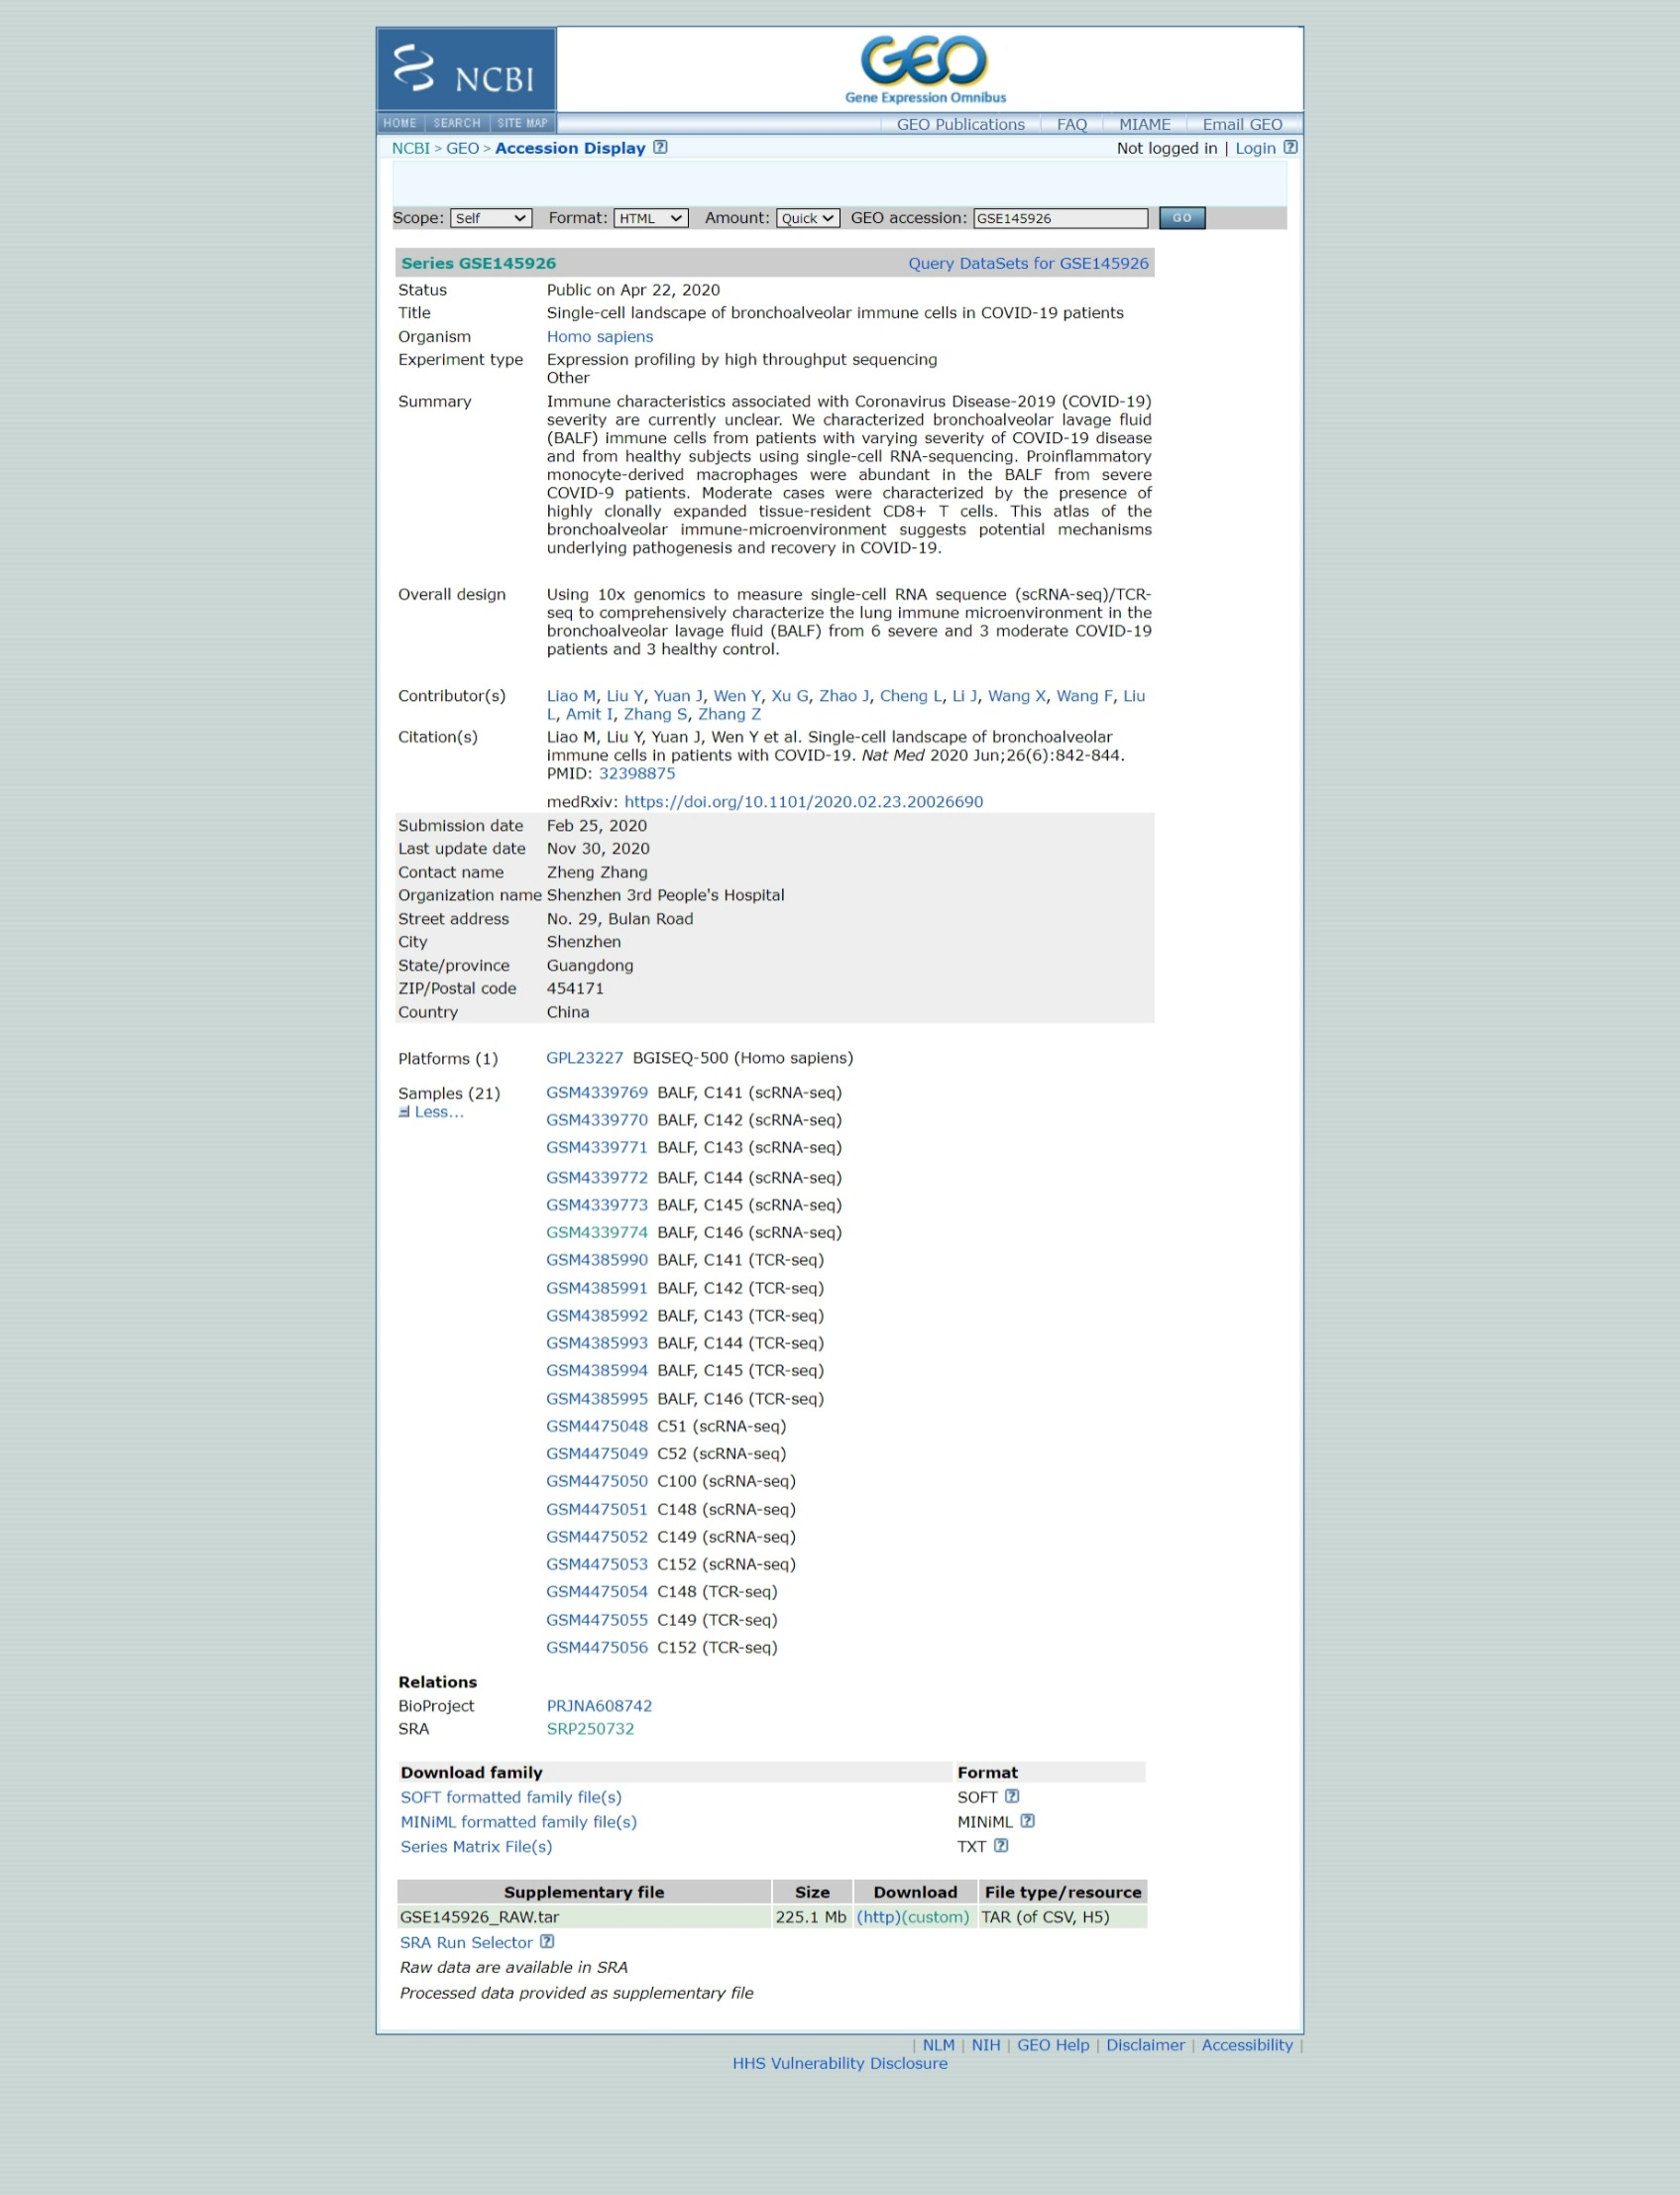

## Download the GEO's raw data

In [ ]:
# Download and prepare dataset for analysis
download.file('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE145926&format=file', 'GSE145926_RAW.tar')
shell_call("tar -xf GSE145926_RAW.tar")
shell_call("rm GSE145926_RAW.tar")
shell_call("ls -lh")

total 226M
drwxr-xr-x 2 root root 4.0K Oct  7 23:55 Figures
-rw-rw-r-- 1 4710 5007  21M Feb 19  2020 GSM4339769_C141_filtered_feature_bc_matrix.h5
-rw-rw-r-- 1 4710 5007  21M Feb 19  2020 GSM4339770_C142_filtered_feature_bc_matrix.h5
-rw-r--r-- 1 root root 500K Oct  7 23:36 GSM4339770_doubletFile.txt
-rw-rw-r-- 1 4710 5007  52M Feb 19  2020 GSM4339771_C143_filtered_feature_bc_matrix.h5
-rw-rw-r-- 1 4710 5007 4.1M Feb 19  2020 GSM4339772_C144_filtered_feature_bc_matrix.h5
-rw-rw-r-- 1 4710 5007  30M Feb 19  2020 GSM4339773_C145_filtered_feature_bc_matrix.h5
-rw-rw-r-- 1 4710 5007 6.1M Feb 19  2020 GSM4339774_C146_filtered_feature_bc_matrix.h5
-rw-rw-r-- 1 4710 5007  93K Mar  5  2020 GSM4385990_C141_filtered_contig_annotations.csv.gz
-rw-rw-r-- 1 4710 5007  96K Mar  5  2020 GSM4385991_C142_filtered_contig_annotations.csv.gz
-rw-rw-r-- 1 4710 5007 175K Mar  5  2020 GSM4385992_C143_filtered_contig_annotations.csv.gz
-rw-rw-r-- 1 4710 5007  12K Mar  5  2020 GSM4385993_C144_filtered_contig_a

In [ ]:
# Organize scRNA-seq and TCR-seq data
shell_call("mkdir -p TCRseq")
shell_call("mv *_filtered_contig_annotations.csv.gz TCRseq/")
shell_call("mkdir -p scRNAseq")
shell_call("mv *_filtered_* scRNAseq/")
shell_call("ls -lh")

total 516K
drwxr-xr-x 2 root root 4.0K Oct  7 23:55 Figures
-rw-r--r-- 1 root root 500K Oct  7 23:36 GSM4339770_doubletFile.txt
drwxr-xr-x 1 root root 4.0K Oct  4 13:23 sample_data
drwxr-xr-x 2 root root 4.0K Oct  8 00:50 scRNAseq
drwxr-xr-x 2 root root 4.0K Oct  8 00:50 TCRseq

We will now load data for a single sample. 10X Genomics data is usually stored in the HDF5 format, a high-performance format intended for handling large and complex datasets. The `Read10X_h5()` function is designed to efficiently import this data into R. It uses a special matrix format that optimizes memory usage and speed by efficiently handling data with a large number of zero values, which is typical in single-cell RNA sequencing datasets.

## Read sample **GSM4339770_C142**

Sample `GSM4339770_C142` corresponds to a bronchoalveolar lavage fluid (BALF) sample taken from the lung tissue of a patient with mild COVID-19. The sequencing was performed using the BGISEQ-500 platform, with a paired-end RNA-Seq assay.




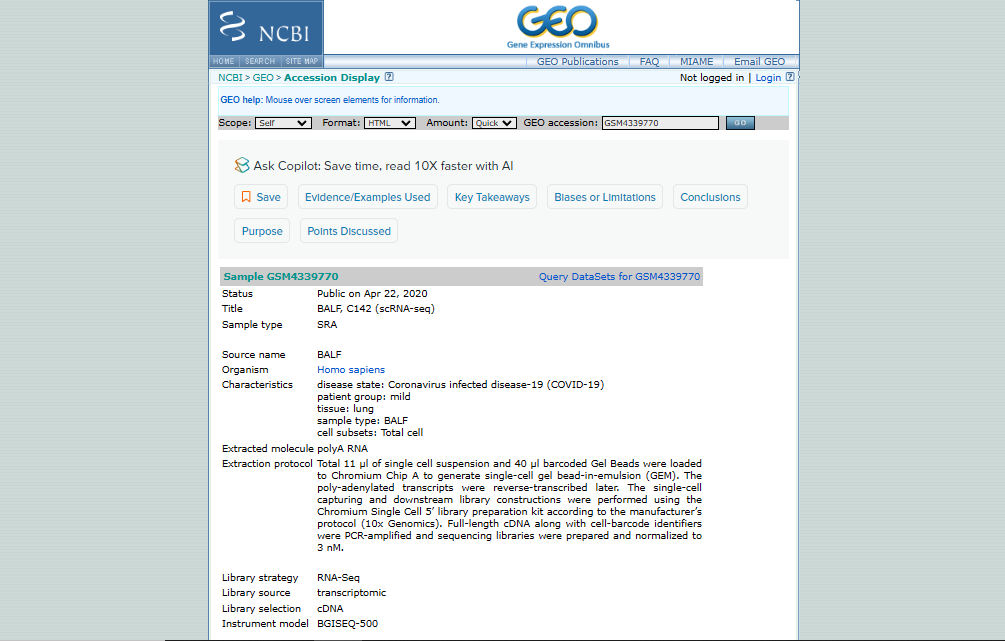

In [ ]:
# Load the scRNA-seq dataset using Seurat
sc <- Read10X_h5("/content/scRNAseq/GSM4339770_C142_filtered_feature_bc_matrix.h5")

### Explanation of Sparse Matrices in Seurat

A sparse matrix in single-cell RNA sequencing refers to a data structure that efficiently represents gene expression data, where most of the entries are zero. In this context, rows typically represent individual cells, columns represent genes, and the non-zero entries indicate the expression levels of specific genes in those cells. This format saves memory and computational resources, making it suitable for handling large-scale single-cell datasets where many genes are not expressed in every cell.

In [ ]:
sc[1:10, 1:3]

10 x 3 sparse Matrix of class "dgCMatrix"
            AAACCTGAGATCGGGT-1 AAACCTGAGTGAACGC-1 AAACCTGCAGCTGCAC-1
MIR1302-2HG                  .                  .                  .
FAM138A                      .                  .                  .
OR4F5                        .                  .                  .
AL627309.1                   .                  .                  .
AL627309.3                   .                  .                  .
AL627309.2                   .                  .                  .
AL627309.4                   .                  .                  .
AL732372.1                   .                  .                  .
OR4F29                       .                  .                  .
AC114498.1                   .                  .                  .

Observe how the size of the object changes significantly after conversion to a sparse matrix. For instance, an object that was initially around 2630.7 MB may reduce to less than 160MB. This efficiency is crucial for handling large-scale single-cell datasets.

In [ ]:
# Size comparison between dense and sparse matrix formats
dense.size <- object.size(as.matrix(sc))
sparse.size <- object.size(sc)
format(dense.size, "MB")
format(sparse.size, "MB")
dense.size/sparse.size

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.6 GiB”


[1] "2630.7 Mb"

[1] "153.6 Mb"

17.1 bytes

# **1. Exploring the data**

Let's examine the sparse counts matrix. First we can see the class of the object, in this case "dgCMatrix" indicate that it is a sparse matrix in a compressed column format.

In [ ]:
class(sc)

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [ ]:
# Select some rows and some columns
cat("Subsetting some rows and columns:\n",sep=" ")
print(sc[100:105, 1:3])

# What are the names of genes
cat("\n","Gene names are:\n",sep=" ")
print(rownames(sc)[100:105])

# Extract the names of cells
cat("\n","Cell names are:\n",sep=" ")
print(colnames(sc)[1:3]) # Cell Barcode

# Select using rownames (colnames)
cat("\n","Selecting rows using gene names and columns:\n",sep=" ")
print(sc[c("MIR1302-2HG", "FAM138A", "OR4F5"), 1:3])

Subsetting some rows and columns:
6 x 3 sparse Matrix of class "dgCMatrix"
             AAACCTGAGATCGGGT-1 AAACCTGAGTGAACGC-1 AAACCTGCAGCTGCAC-1
HES5                          .                  .                  .
AL139246.5                    .                  .                  .
TNFRSF14-AS1                  .                  .                  .
TNFRSF14                      .                  1                  .
AL139246.3                    .                  .                  .
FAM213B                       .                  .                  .

 Gene names are:
[1] "HES5"         "AL139246.5"   "TNFRSF14-AS1" "TNFRSF14"     "AL139246.3"  
[6] "FAM213B"     

 Cell names are:
[1] "AAACCTGAGATCGGGT-1" "AAACCTGAGTGAACGC-1" "AAACCTGCAGCTGCAC-1"

 Selecting rows using gene names and columns:
3 x 3 sparse Matrix of class "dgCMatrix"
            AAACCTGAGATCGGGT-1 AAACCTGAGTGAACGC-1 AAACCTGCAGCTGCAC-1
MIR1302-2HG                  .                  .                  .
FAM138A 

In [ ]:
# Dimensions of the scRNA-seq matrix
dims <- dim(sc)
num_genes <- dims[1]
num_cells <- dims[2]
cat("The dataset contains", num_genes, "genes and", num_cells, "cells.\n")
cat("Matrix class:", class(sc), "\n")

The dataset contains 33539 genes and 10269 cells.
Matrix class: dgCMatrix 


To analyze the data with Seurat pipeline, we will first **create a Seurat object**. In this step, we choose to filter out genes that are observed in fewer than 3 cells and cells that contain fewer than 200 genes. The filters in this step are not mandatory, so feel free to use different cutoffs or ignore them entirely at this stage.

In [ ]:
sampleA <- CreateSeuratObject(counts = sc, project="sampleA", min.cells=3, min.features=200)
sampleA

An object of class Seurat 
19966 features across 4562 samples within 1 assay 
Active assay: RNA (19966 features, 0 variable features)
 1 layer present: counts

What is the size of our Seurat object?
How many genes and cells were removed from original table?

In [ ]:
# Size of the original data matrix
original_dims <- dim(sc)
original_genes <- original_dims[1]
original_cells <- original_dims[2]

# Size of the Seurat object
seurat_dims <- dim(sampleA)
filtered_genes <- seurat_dims[1]
filtered_cells <- seurat_dims[2]

# Calculate the number of removed genes and cells
removed_genes <- original_genes - filtered_genes
removed_cells <- original_cells - filtered_cells

# Print the results
cat("The size of the original data matrix is:", original_genes, "genes and", original_cells, "cells.\n")
cat("The size of the Seurat object is:", filtered_genes, "genes and", filtered_cells, "cells.\n")
cat("Number of genes removed:", removed_genes, "\n")
cat("Number of cells removed:", removed_cells, "\n")

The size of the original data matrix is: 33539 genes and 10269 cells.
The size of the Seurat object is: 19966 genes and 4562 cells.
Number of genes removed: 13573 
Number of cells removed: 5707 


Now, we can see another characteristics about this object. Seurat object not only saves the saparse matrix, it also saves different assays, dimensional reductions, meta data and more...

Let's see the slots we have in this moment:

In [ ]:
# Checking slot names
slotNames(sampleA)

[1] "assays"       "meta.data"    "active.assay" "active.ident" "graphs"      
 [6] "neighbors"    "reductions"   "images"       "project.name" "misc"        
[11] "version"      "commands"     "tools"

Let's inspect a slot. For typical scRNA-seq experiments, a Seurat object will have a single Assay (“RNA”). This assay will also store multiple transformations of the data, including raw counts, normalized data and scaled data for dimensional reduction.

In [ ]:
sampleA@assays

$RNA
Assay (v5) data with 19966 features for 4562 cells
First 10 features:
 AL627309.1, AL627309.3, AL669831.5, FAM87B, LINC00115, FAM41C,
AL645608.7, SAMD11, NOC2L, KLHL17 
Layers:
 counts 


To access the information within `RNA` we can do:

In [ ]:
sampleA@assays$RNA

Assay (v5) data with 19966 features for 4562 cells
First 10 features:
 AL627309.1, AL627309.3, AL669831.5, FAM87B, LINC00115, FAM41C,
AL645608.7, SAMD11, NOC2L, KLHL17 
Layers:
 counts 

Importantly, `so@assays$RNA` also has slots! We can find find more than just the expression matrix.

In [ ]:
slotNames(sampleA@assays$RNA)

[1] "layers"     "cells"      "features"   "default"    "assay.orig"
[6] "meta.data"  "misc"       "key"

In [ ]:
class(sampleA@assays$RNA@layers)

[1] "list"

In [ ]:
names(sampleA@assays$RNA@layers)

[1] "counts"

In [ ]:
sampleA@assays$RNA@layers$counts[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
              
[1,] . . . . .
[2,] . . . . .
[3,] . . . 1 .
[4,] . . . . .
[5,] . . . . .

Let's now inspect another slot, `meta.data`: Here we are going to find nFeature_RNA, that is the number of features like genes detected in each cell and nCount_RNA, that is the total number of reads detected within a cell.

In [ ]:
head(sampleA@meta.data)

orig.ident nCount_RNA nFeature_RNA
AAACCTGAGTGAACGC-1 sampleA     4277      1438        
AAACCTGGTCAAAGCG-1 sampleA    30770      5209        
AAACCTGGTGAGGCTA-1 sampleA     3771      1688        
AAACCTGTCACCATAG-1 sampleA    26718      4372        
AAACCTGTCCACGCAG-1 sampleA    25396      4953        
AAACGGGAGCTGAAAT-1 sampleA     2759      1409

# **2.Quality control**


In the seurat object there exist already some variables that can help in the quality control as are:

* `nFeature_RNA`: the number of genes detected in each cell.
* `nCount_RNA`: the total number of molecules detected within a cell. Low nFeature_RNA for a cell indicates that it may be dead/dying or an empty droplet. High nCount_RNA and/or nFeature_RNA indicates that the "cell" may in fact be a doublet (or multiplet).


In [ ]:
# QC metrics for the first 5 cells
cat("QC metrics for the first few cells:\n")
head(sampleA@meta.data, 5)

QC metrics for the first few cells:


orig.ident nCount_RNA nFeature_RNA
AAACCTGAGTGAACGC-1 sampleA     4277      1438        
AAACCTGGTCAAAGCG-1 sampleA    30770      5209        
AAACCTGGTGAGGCTA-1 sampleA     3771      1688        
AAACCTGTCACCATAG-1 sampleA    26718      4372        
AAACCTGTCCACGCAG-1 sampleA    25396      4953

## 2.1 Calculate the percentage of mitochondrial genes

You can learn a lot about your data's quality using simple plotting. We will use Seurat to visualize key quality control metrics for our single cell RNA-seq data.

First we will calculate the percentage of mitochondrial gene counts, a common indicator of cell quality. Remember that high percentage of mitochondrial reads is generally associated to high-stress and low-quality cells. Note that we are saving percent.mt in the metadata of sampleA.

In [ ]:
# Set plot size
options(repr.plot.width = 12, repr.plot.height = 10)

sampleA[["percent.mt"]] <- PercentageFeatureSet(sampleA, pattern = "^MT-")

Now let's do some plotting to inspect the distribution and relationships of features like **nFeature_RNA** that shows the expressed genes per cell (often called complexity), **nCount_RNA** which is the number of detected UMI for every cell, and **percent.mt** that represent the percentage of mitochondrial genes for every cell. This helps to identify and filter out low-quality cells and even can be use to detect resting doublets.

Warning message in system(command, intern = TRUE, ...):
“running command 'mkdir Figures' had status 1”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Saving 7 x 7 in image


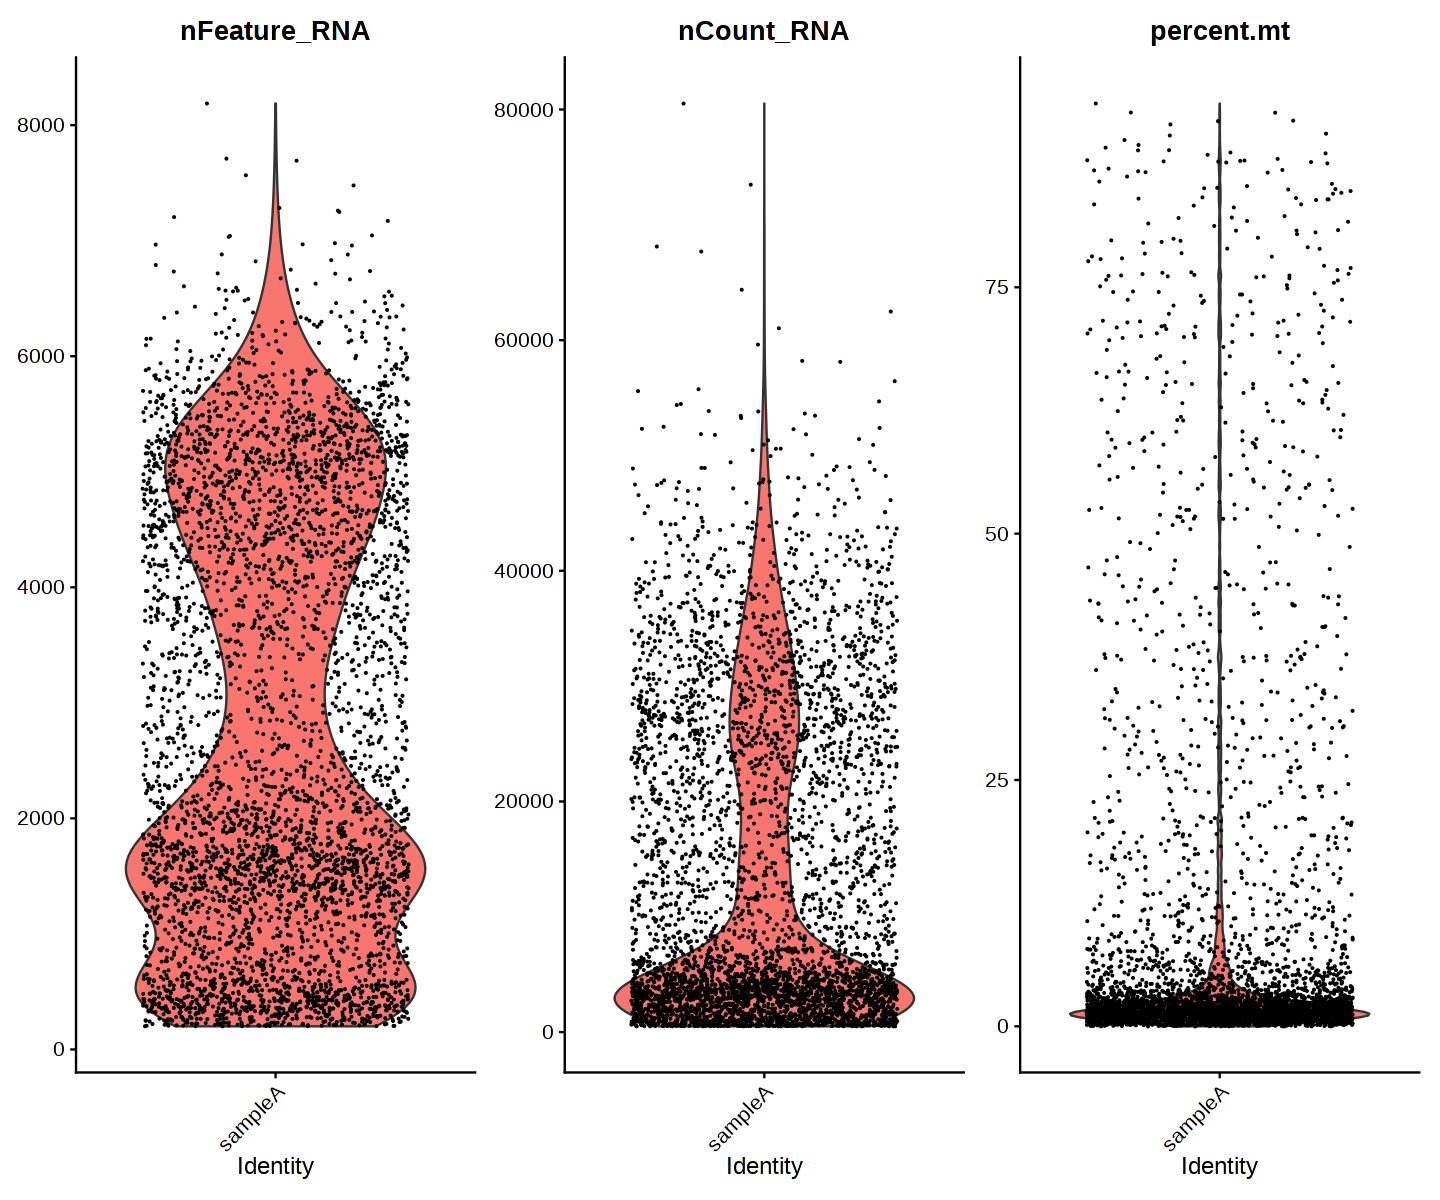

In [ ]:
# Create folder for Figures
shell_call("mkdir Figures")

# Generate violin plots to visualize the distribution of nFeature_RNA, nCount_RNA and percent.mt
VlnPlot(sampleA, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
ggsave("Figures/ViolinPlot_nFeature_nCount_percentMT.png")

Black dots represent the values for individual cells, and the red shapes show the distribution of the data. We can observe some cells with a high `nCount_RNA` but not a correspondingly high `nFeature_RNA`, indicating that a  some cells has a large amount of RNA but they can be from few genes highly expressed. This could suggest the presence of doublets, dead cells, or other artifacts, so it may be necessary to apply additional filtering to remove such cells and ensure the quality of the dataset. We can see that some cells have high mitocondrial percentage compared with the majority distribution.

Now, let's plot the `feature scatter plot` that allows us to visualize the relationship between two variables, for example: “nCount-percent.mito” and “nCount-nFeature”. We can see a subset of cells with an aberrant level of high percentage of mitochondria (percent.mito) and a low level of UMI (nCount), reforcing the need to filter our data. On the other side if we see the "nFeature_RNA" and "nCount_RNA", we can notice two groups, there is one with more features than counts, this could be due to possible doublets, RNA contamination, groups of cells stressed or could be also a rare cell population.

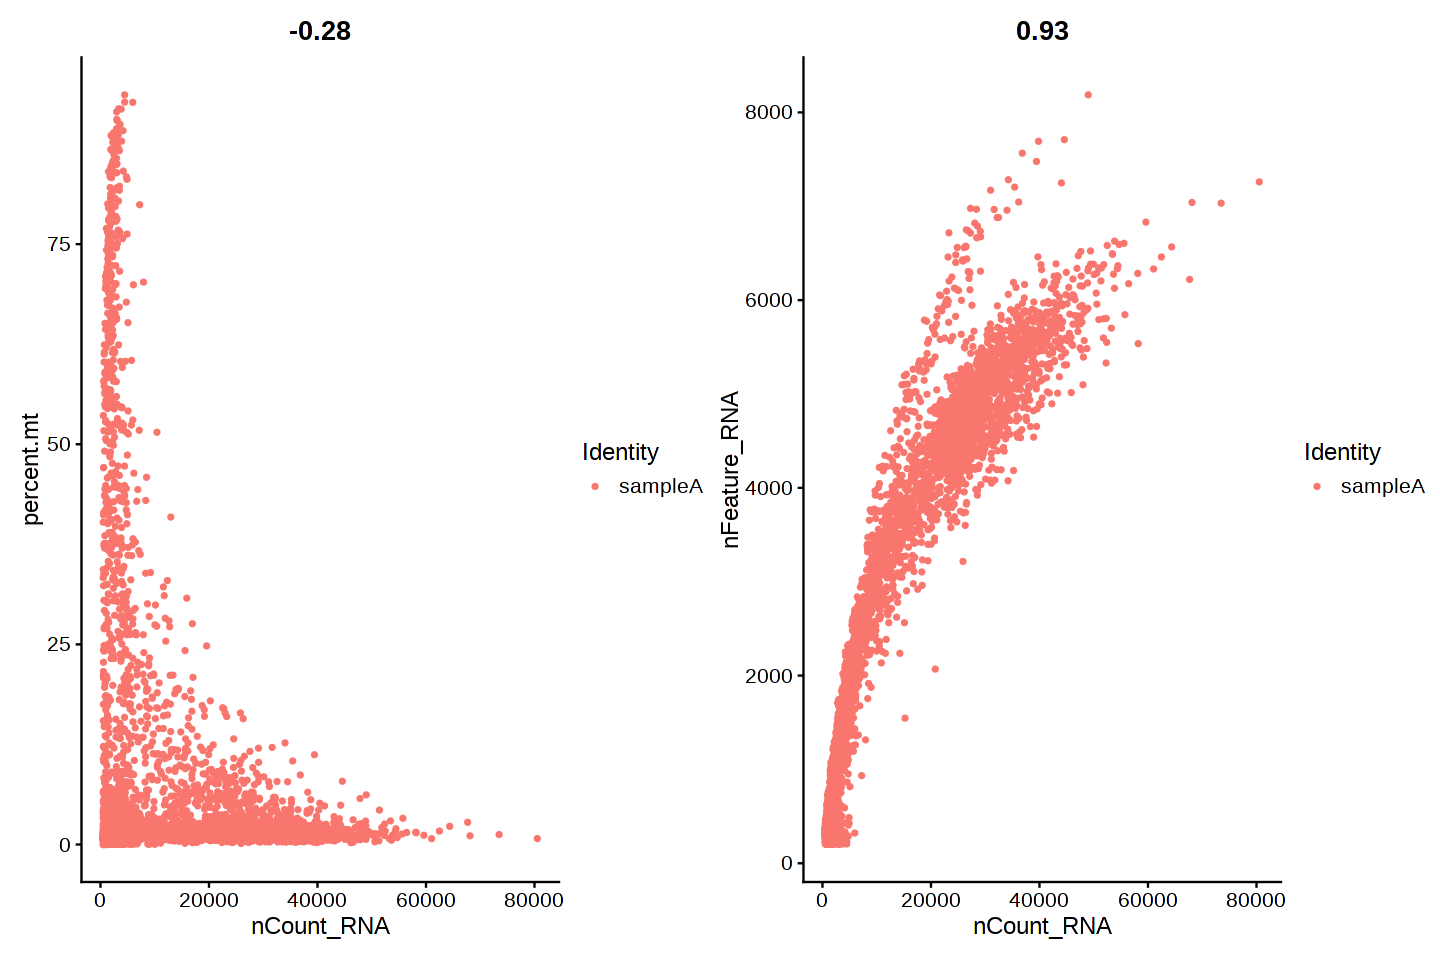

In [ ]:
# Set plot size
options(repr.plot.width = 12, repr.plot.height = 8)
## Scatter plots for visual inspection of relationships between metrics
plot1 <- FeatureScatter(sampleA, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(sampleA, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2
#ggsave("Figures/FeatureScatterPlot_nFeature_nCount_percentMT.png")

There exists more graphics that we can use ans that can offer to us a different perspective of the data.

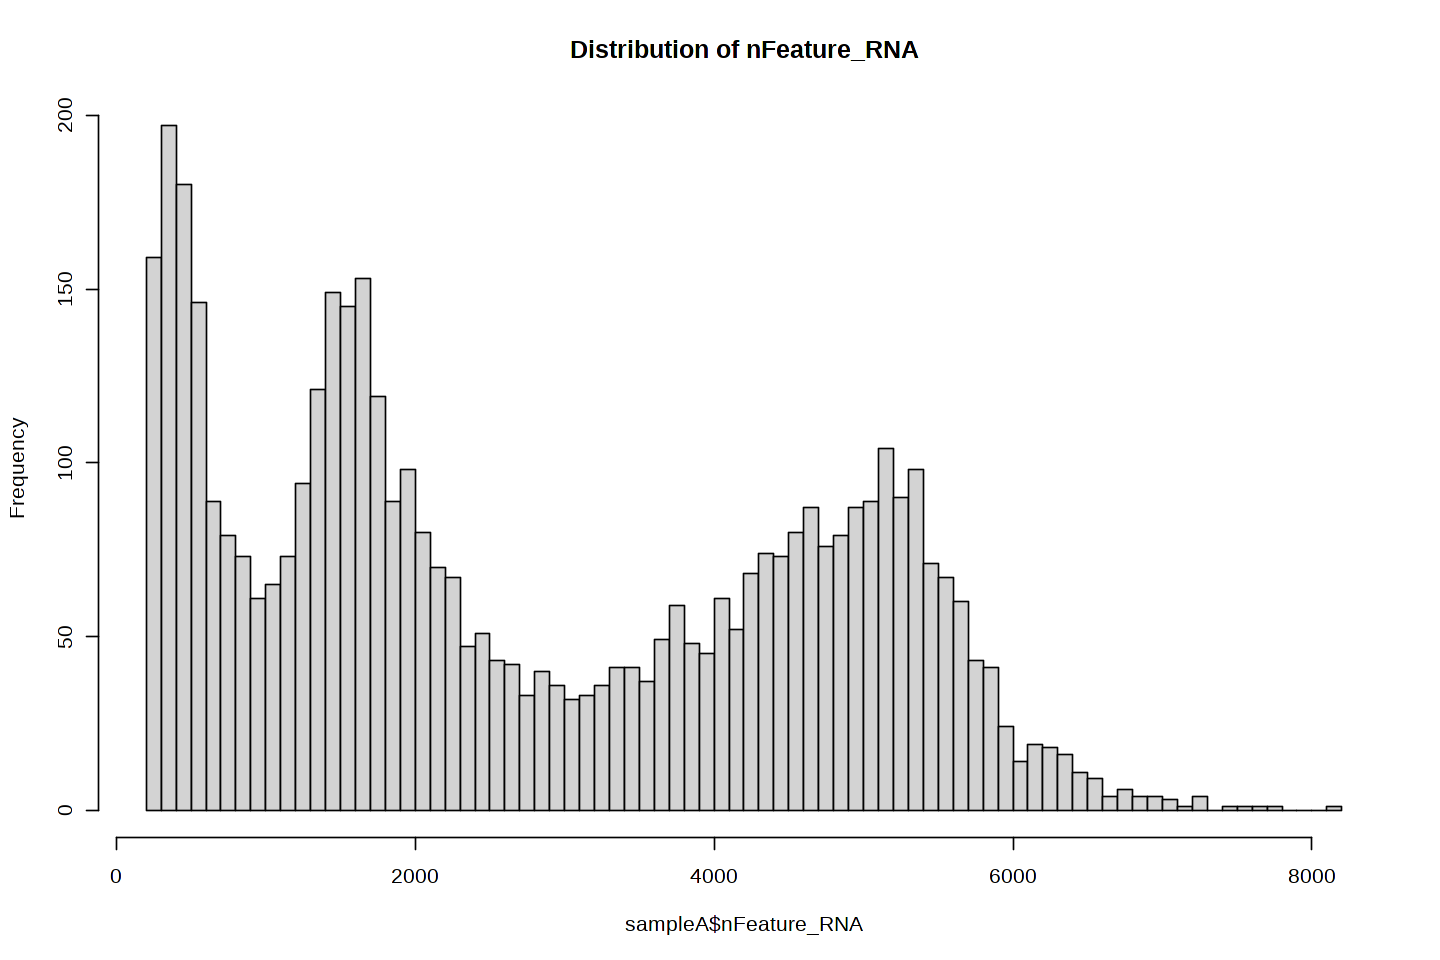

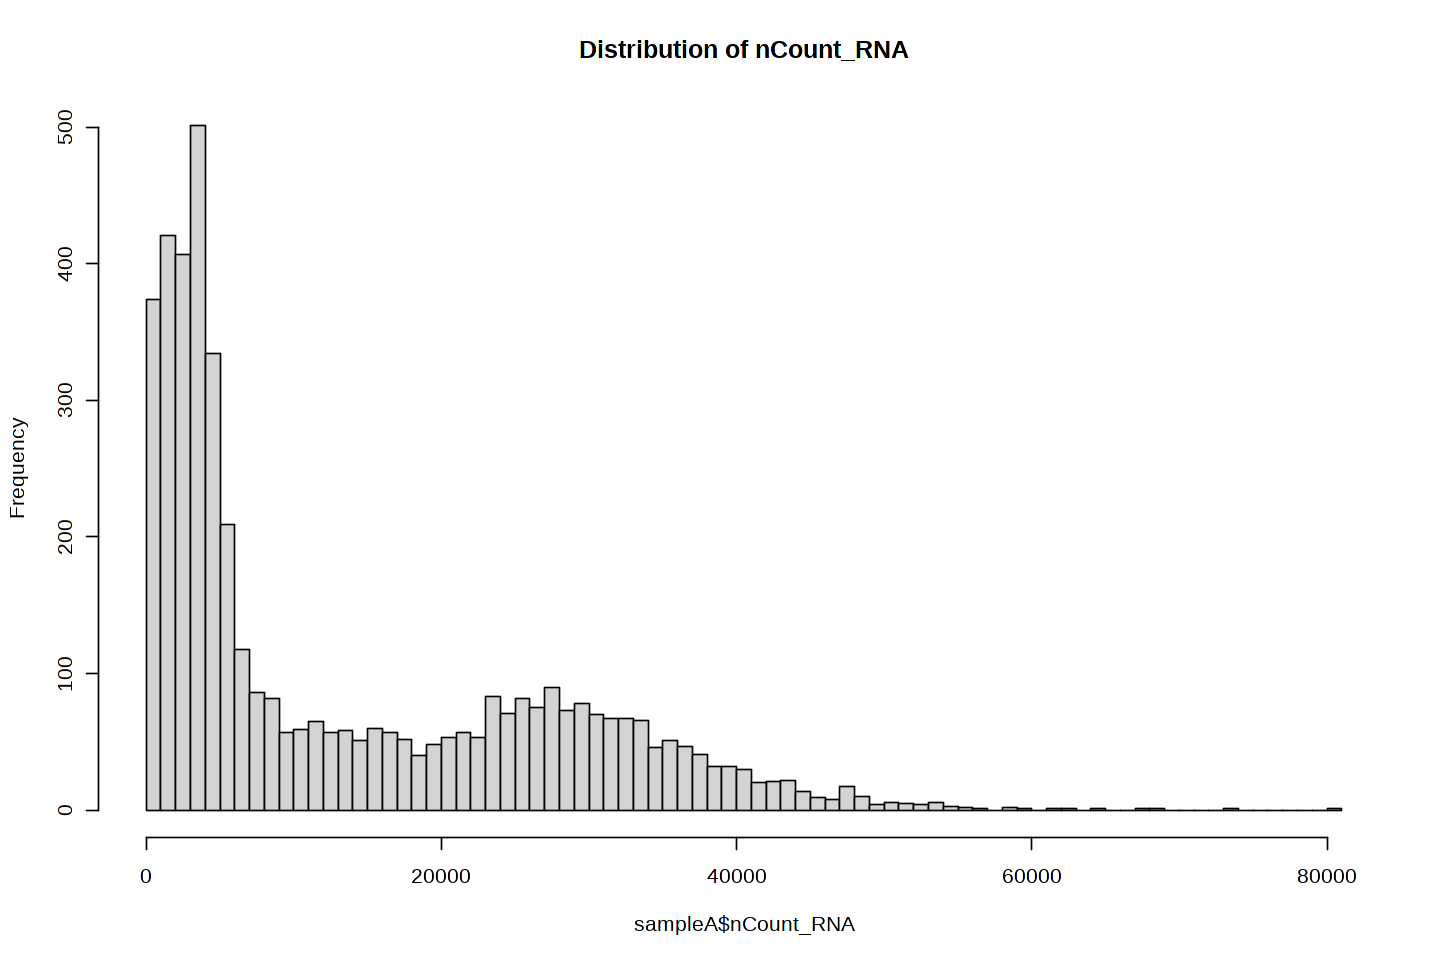

pdf 
  2

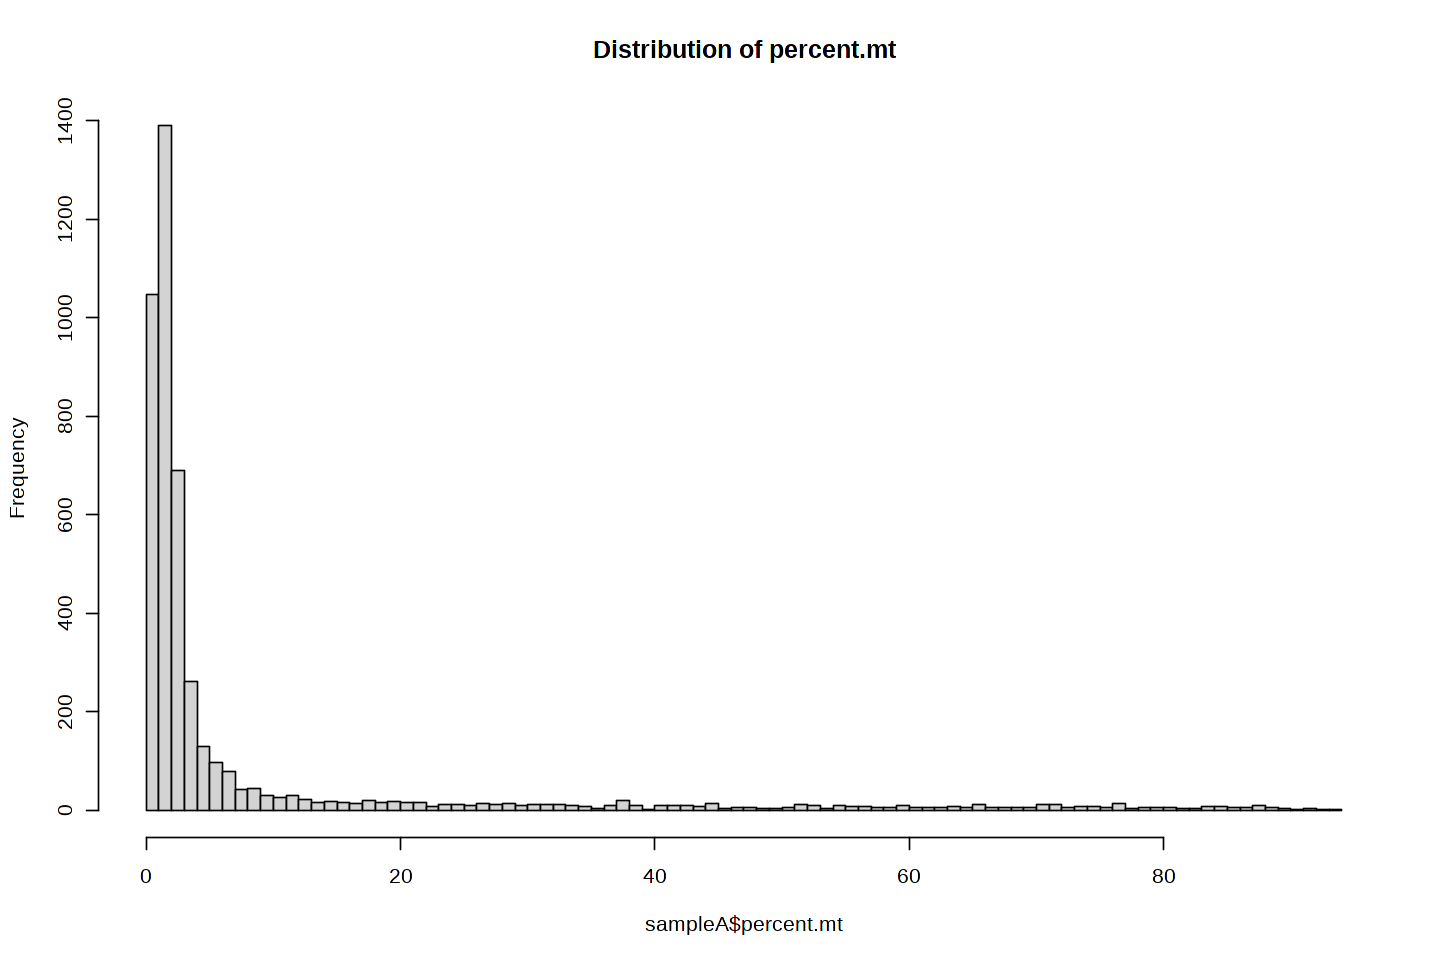

In [ ]:
# Histogram of RNA features and counts post-filtering
hist1 = hist(sampleA$nFeature_RNA, breaks = 100, main = "Distribution of nFeature_RNA")
hist2 = hist(sampleA$nCount_RNA, breaks = 100, main = "Distribution of nCount_RNA")
hist3 = hist(sampleA$percent.mt, breaks = 100, main = "Distribution of percent.mt")

pdf("Figures/histograms_sampleA.pdf")
plot(hist1)
plot(hist2)
plot(hist3)
dev.off()

## 2.2 Identify and Remove Doublets

Doublets are instances where two cells are mistakenly captured in the same droplet or well during single-cell sequencing. This issue commonly arises when there is an overloading of cells, leading to mixed signals that can complicate the analysis.

To identify the doublets we will use the `scDblFinder`. This method uses a probabilist approach to identify doublets and, for this reason, can generate results that are slightly different from previous runs. To mitigate this reproducibility issue, we need to set a random seed, using the `set.seed()` command, which will guarantee that we get the same results everytime we run the code. Now, one characteristic of this method is that it requiere an object of class `SingleCellExperiment`, so let's transform our object class.


In [ ]:
# Convert Seurat object to SingleCellExperiment object
sce <- as.SingleCellExperiment(sampleA)
# Display the converted object
sce

Warning message:
“Layer ‘data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”


class: SingleCellExperiment 
dim: 19966 4562 
metadata(0):
assays(1): counts
rownames(19966): AL627309.1 AL627309.3 ... AC233755.2 AC240274.1
rowData names(0):
colnames(4562): AAACCTGAGTGAACGC-1 AAACCTGGTCAAAGCG-1 ...
  TTTGTCATCCCAGGTG-1 TTTGTCATCGTTGCCT-1
colData names(5): orig.ident nCount_RNA nFeature_RNA percent.mt ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [ ]:
# Set seed for reproducibility
set.seed(123)

# Identify doublets using scDblFinder
sce <- scDblFinder(sce)

Creating ~3650 artificial doublets...

Dimensional reduction

Evaluating kNN...

Training model...

iter=0, 711 cells excluded from training.

iter=1, 723 cells excluded from training.

iter=2, 696 cells excluded from training.

Threshold found:0.438

335 (7.3%) doublets called



It is good practice to save intermediate results throughout the analysis process. For example, we can save the output from scDblFinder() to reuse later in the workflow.

In [ ]:
results = sce@colData@listData %>% as.data.frame()
head(results)

orig.ident nCount_RNA nFeature_RNA percent.mt ident   scDblFinder.class
1 sampleA     4277      1438         2.244564   sampleA singlet          
2 sampleA    30770      5209         1.410465   sampleA doublet          
3 sampleA     3771      1688         1.829753   sampleA singlet          
4 sampleA    26718      4372         1.972453   sampleA singlet          
5 sampleA    25396      4953         2.457080   sampleA singlet          
6 sampleA     2759      1409         4.131932   sampleA singlet          
  scDblFinder.score scDblFinder.weighted scDblFinder.cxds_score
1 0.0011192646      0.20086779           6.894233e-03          
2 0.9942911863      0.68237897           7.407239e-09          
3 0.0001501217      0.13584184           1.304095e-02          
4 0.0003771290      0.27411218           7.180694e-03          
5 0.0304813217      0.38011187           1.874952e-02          
6 0.0013843344      0.02455312           8.737461e-03

In [ ]:
outfile = file.path('GSM4339770_analysis/GSM4339770_doubletFile.txt')
#write.table(results, outfile, sep='\t', quote=F, col.names=TRUE, row.names=TRUE)

In [ ]:
# Extract doublet scores and labels, then add to Seurat object
sampleA$doublet_score <- colData(sce)$scDblFinder.score
sampleA$doublet_label <- colData(sce)$scDblFinder.class

# Verify the added information in Seurat metadata
cat("Sample metadata after doublet detection:\n")
head(sampleA@meta.data)

Sample metadata after doublet detection:


orig.ident nCount_RNA nFeature_RNA percent.mt doublet_score
AAACCTGAGTGAACGC-1 sampleA     4277      1438         2.244564   0.0011192646 
AAACCTGGTCAAAGCG-1 sampleA    30770      5209         1.410465   0.9942911863 
AAACCTGGTGAGGCTA-1 sampleA     3771      1688         1.829753   0.0001501217 
AAACCTGTCACCATAG-1 sampleA    26718      4372         1.972453   0.0003771290 
AAACCTGTCCACGCAG-1 sampleA    25396      4953         2.457080   0.0304813217 
AAACGGGAGCTGAAAT-1 sampleA     2759      1409         4.131932   0.0013843344 
                   doublet_label
AAACCTGAGTGAACGC-1 singlet      
AAACCTGGTCAAAGCG-1 doublet      
AAACCTGGTGAGGCTA-1 singlet      
AAACCTGTCACCATAG-1 singlet      
AAACCTGTCCACGCAG-1 singlet      
AAACGGGAGCTGAAAT-1 singlet

In the table the column `double_label` indicates which cells are singlets and which ones are doublets, filtering over this column we can conserv the single cell data we need.

In [ ]:
# Filter to keep only singlets and update Seurat object
keep <- which(sampleA$doublet_label == "singlet")
sampleA <- sampleA[, keep]

## Verify the subsetted object
cat("Sample metadata after subsetting singlets:\n")
head(sampleA@meta.data)

Sample metadata after subsetting singlets:


orig.ident nCount_RNA nFeature_RNA percent.mt doublet_score
AAACCTGAGTGAACGC-1 sampleA     4277      1438         2.244564   0.0011192646 
AAACCTGGTGAGGCTA-1 sampleA     3771      1688         1.829753   0.0001501217 
AAACCTGTCACCATAG-1 sampleA    26718      4372         1.972453   0.0003771290 
AAACCTGTCCACGCAG-1 sampleA    25396      4953         2.457080   0.0304813217 
AAACGGGAGCTGAAAT-1 sampleA     2759      1409         4.131932   0.0013843344 
AAACGGGAGGTGGGTT-1 sampleA     4176      1656         2.179119   0.0002913584 
                   doublet_label
AAACCTGAGTGAACGC-1 singlet      
AAACCTGGTGAGGCTA-1 singlet      
AAACCTGTCACCATAG-1 singlet      
AAACCTGTCCACGCAG-1 singlet      
AAACGGGAGCTGAAAT-1 singlet      
AAACGGGAGGTGGGTT-1 singlet

Deleting doublets we have reduced our data from zise `19966 x 4562` to `19966 x 4227`.

In [ ]:
dim(sampleA)

[1] 19966  4227

We can also remove cells with over 10% mitochrondrial reads, which may be a sign of ex-vivo damage during sample handling and library generation. This reduce our data size from `19966 x 4227` to `19966 x 3547`.

In [ ]:
# Subset the Seurat object to exclude cells with high mitochondrial content
sampleA <- subset(sampleA, subset = percent.mt < 10)
dim(sampleA)

[1] 19966  3547

Let's plot some QC plots after the filtering.

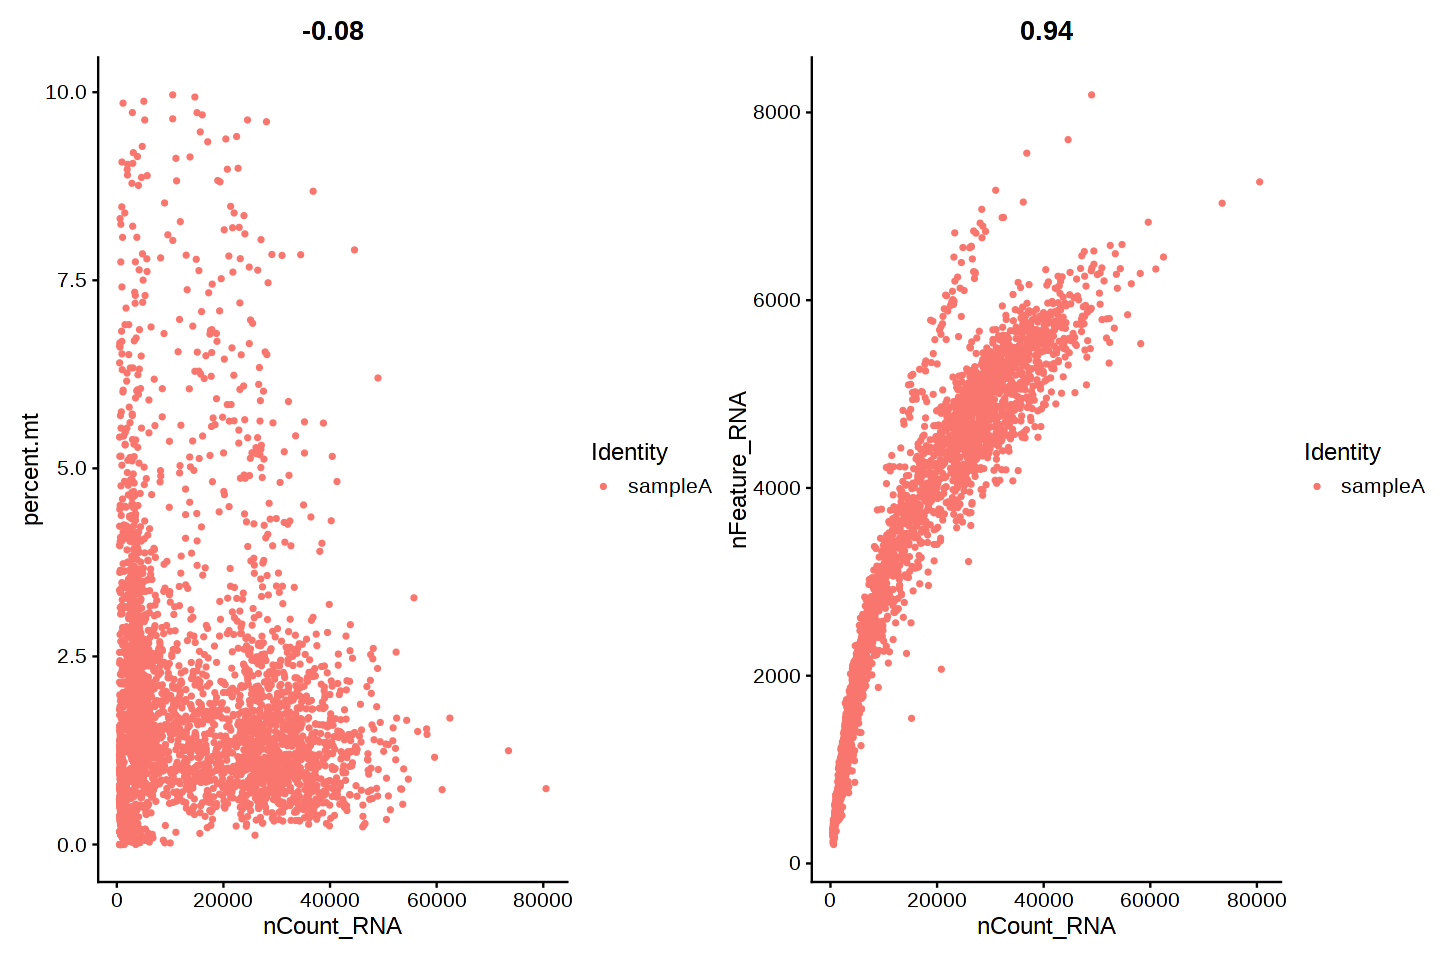

In [ ]:
# Set plot size
options(repr.plot.width = 12, repr.plot.height = 8)
# Scatter plots for visual inspection of relationships between metrics
plot1 <- FeatureScatter(sampleA, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(sampleA, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2
#ggsave("Figures/FeatureScatterPlot_nFeature_nCount_percentMT_filtered.png")

HWe can now observe the size of our dataset after all the filtering steps. It is possible to apply multiple rounds of quality control, however, additional filtering can reduce the number of cells, this reduction could impact negatively our results. For example, applying strict filters could remove rare cell populations.

In [ ]:
cat("\n","Dimension of data before filtering:", dim(sc))

cat("\n","Dimension of data after filtering:", dim(sampleA))


 Dimension of data before filtering: 33539 10269
 Dimension of data after filtering: 19966 3547

We can save our data, allowing us to have a checkpoint to continue from this point without having to rerun everything in the future.

In [ ]:
#shell_call(mkdir GSM4339770_analysis)
#saveRDS(sampleA, "GSM4339770_analysis/GSM4339770_filtered.rds")

# **4. Normalize the data**

To make the counts comparable across cells we need to normalize the data. The normalization corrects the variation in the total RNA per cell. A simple approach involves dividing the counts by the total UMI of the cell, followed by a log transformation. In practice, we also multiply by a scaling factor of 10000 before applying the log transformation. Although this factor is arbitrary, it's a common convention.

In [ ]:
# Normalize the data and visualize QC metrics
sampleA <- NormalizeData(sampleA)

Normalizing layer: counts



# **3.  Identify variable genes**

To visualizate and understand the patterns of gene expression across cells, we can take advantage of visualizations. To start we are going to prioritize genes that can be of interest for downstream analysis, the most variable genes in the dataset. Genes with low variability, or staible variability, are less likely to be informative, so we will focus on the top 2000 most variable genes.

Since highly expressed genes tend to show the most variation, and we don't want the highly variable genes to only be those with high expression, we need to scale the data. This way, the variation is adjusted based on the expression level of the genes. The function allow us to use variance stablizing transformation (vst) to model the mean/variance relationship.

In [ ]:
# Identify the top 2000 most variable genes
sampleA <- FindVariableFeatures(sampleA, selection.method = "vst",
                                nfeatures = 2000)

Finding variable features for layer counts



We can print the 15 most Variable Genes:

In [ ]:
# Display top 15 variable genes
top15 <- head(VariableFeatures(sampleA), 15)
print(top15)

 [1] "C20orf85" "GSTA1"    "CAPS"     "C9orf24"  "CCL4"     "TSPAN1"  
 [7] "CCL2"     "CCL4L2"   "MT1G"     "RSPH1"    "WFDC2"    "SCGB3A1" 
[13] "SNTN"     "C1orf194" "IGFBP7"  


Now, in the next plot we are going to see the variance (after applying the vst) versus the mean expression for each gene. We will highlight the top 2000 most variable genes in red and also we will label the top 15 genes.

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


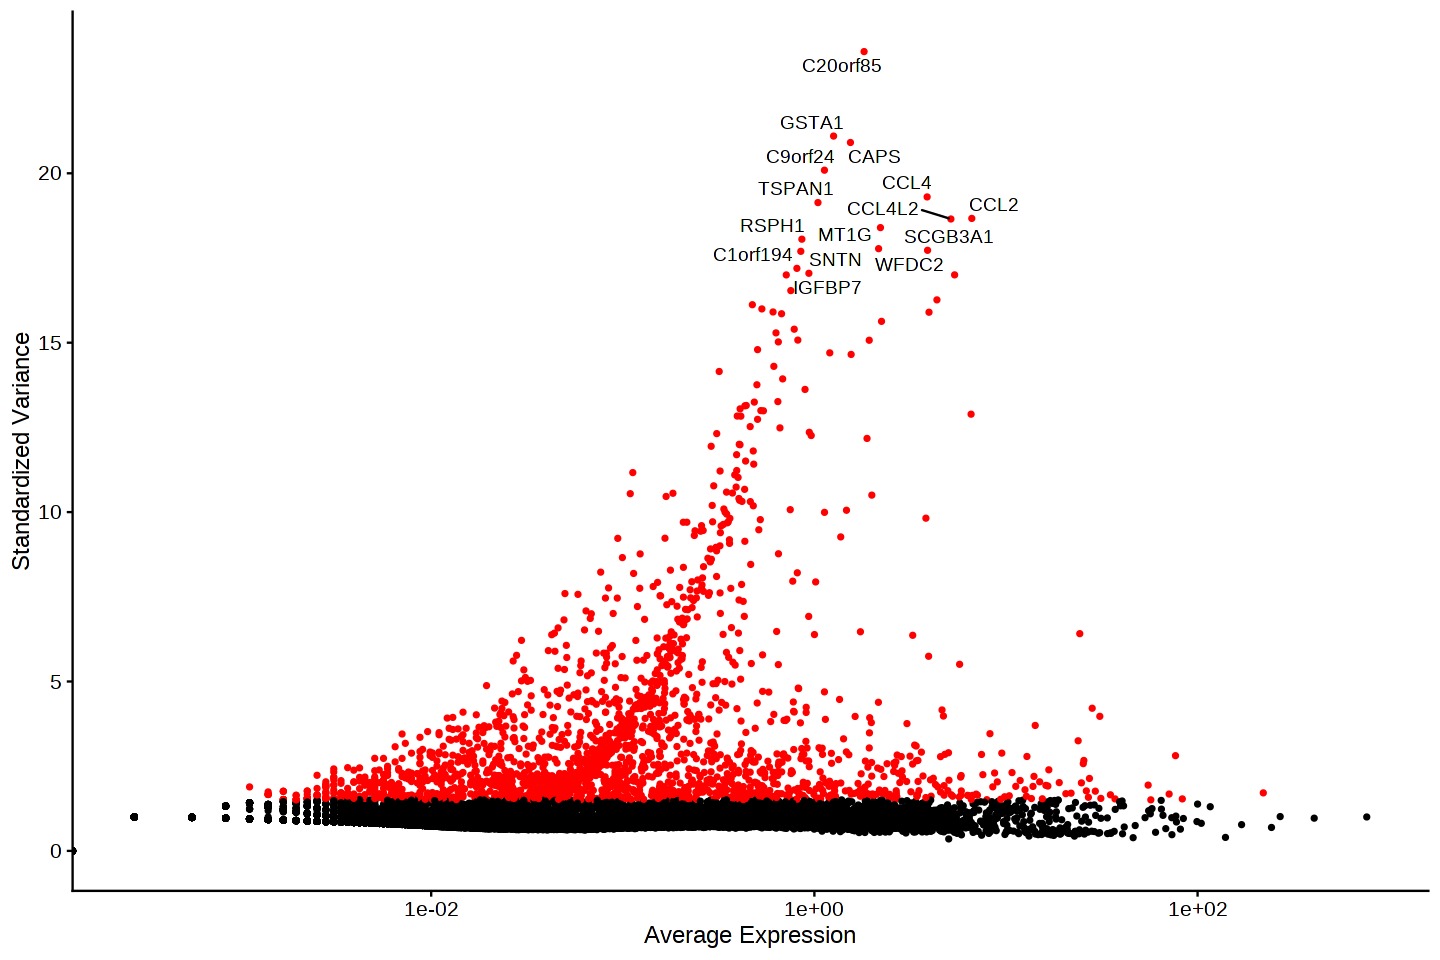

In [ ]:
# Plot variable features with labels
plot1 <- VariableFeaturePlot(sampleA)
final_plot <-LabelPoints(plot=plot1, points = top15, repel=T, xnudge=0, ynudge=0) + theme(legend.position="none")
print(final_plot)

#ggsave("Figures/variable_feature_plot.pdf", plot = final_plot, width = 8, height = 6)

Now, we scale each gene's expression to have a mean of 0 and a variance of 1 across cells. This type of linear transformation is often used in large data analyses so that features (such as genes) with different expression levels can contribute equally to further analysis. In Seurat, we use the fuction ScaleData to normalize the raw counts, this function stores the values in the slot "scale.data" in RNA `sampleA[["RNA"]]@scale.data`.

In [ ]:
# Scale data
all.genes = rownames(sampleA)
sampleA = ScaleData(sampleA, features = all.genes)

Centering and scaling data matrix



In [ ]:
#saveRDS(sampleA, "GSM4339770_analysis/GSM4339770_normalized.rds")

# **5. Dimension Reduction**

To visualize the data, we can apply dimensionality reduction methods like Principal Component Analysis (PCA) and Uniform Manifold Approximation and Projection (UMAP).

## PCA

Principal Component Analysis (PCA) is a widely used method for reducing the dimensionality of high-dimensional datasets. PCA identifies several principal components (PCs), these components capture the most variance in the data, allowing for easier visualization and further analysis. By reducing the number of dimensions, PCA helps to highlight the main patterns and trends in gene expression across cells.

PC_ 1 
Positive:  CTSC, APOC1, CD68, FABP5, SNX10, C1QB, ACP5, C1QC, BCL2A1, APOE 
	   NCF1, SERPINA1, LYZ, S100A9, GPNMB, IGSF6, PLAUR, FABP4, MARCO, PLIN2 
	   FN1, CYBB, CXCL10, FBP1, CD163, HMOX1, VSIG4, CD69, S100A8, TREM1 
Negative:  CFAP157, DYNLRB2, VWA3A, ENKUR, SNTN, LRRIQ1, DNAAF1, RP1, ARMC3, DNAH12 
	   C20orf85, LDLRAD1, RSPH1, ROPN1L, C9orf135, DRC3, C1orf194, C2orf40, C9orf24, SAXO2 
	   C9orf116, HYDIN, DNAH5, CCDC114, SPAG17, LRRC46, DNAH9, AGR3, EFCAB1, ZMYND10 
PC_ 2 
Positive:  CD68, SERPING1, SERPINA1, APOC1, C1QC, C1QB, HLA-DQA1, APOE, GPNMB, FN1 
	   MARCO, HLA-DQB1, CYP27A1, ALDH2, CTSB, NUPR1, CD163, CTSZ, PLBD1, CTSL 
	   CES1, PLAUR, LYZ, TREM1, CD9, FBP1, ACP5, PLD3, LGALS3, IGSF6 
Negative:  IL32, CD3E, CD2, CCL5, CORO1A, PTPRCAP, CD3D, LIMD2, CD7, LCK 
	   CLEC2D, CST7, GZMA, CD3G, NKG7, PRF1, TRBC2, TRAC, CD8A, CD8B 
	   SPOCK2, ITGA4, CXCR3, SYNE2, IL2RB, SH2D2A, LINC01871, GZMB, LINC00861, GZMH 
PC_ 3 
Positive:  MCEMP1, FABP4, RGCC, GPD1, IGFBP2, PCOL

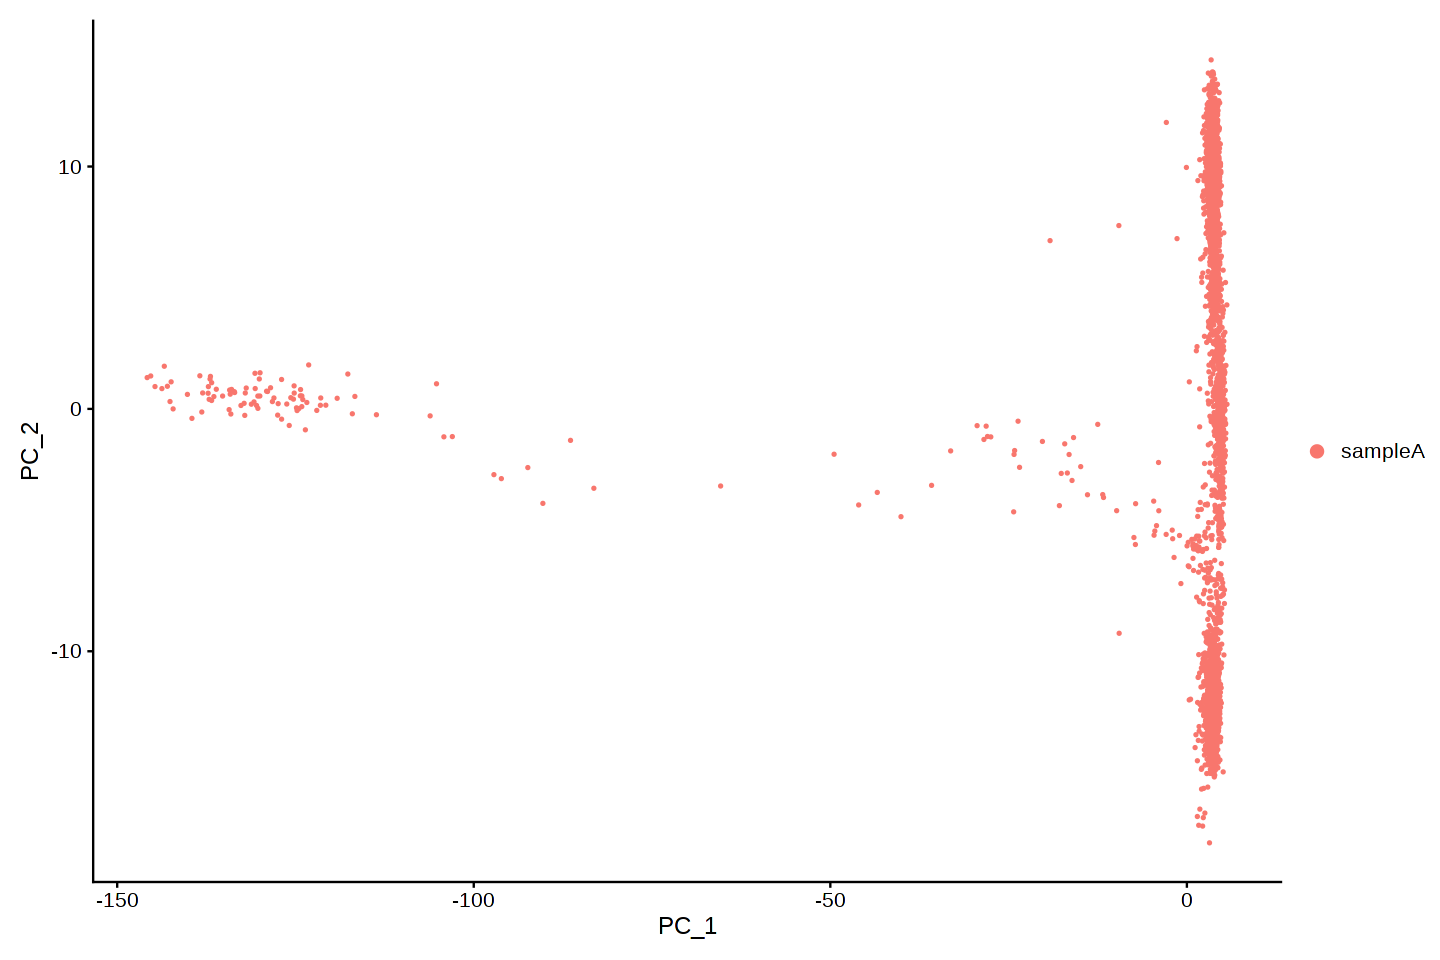

In [ ]:
# Perform PCA and visualize results
sampleA <- RunPCA(sampleA, features = VariableFeatures(sampleA))
DimPlot(sampleA, reduction = "pca")
#ggsave("Figures/pca.png",width = 10,height = 8, dpi = 300)

**Calculate and Visualize PCA Explained Variance**

We can calculate and visualize the variance explained by each principal component (PC) from the PCA results. This helps us understand how much of the total variance in the data is captured by each PC and determine the number of PCs to retain for downstream analysis.


In [ ]:
# Plot variance explained by PCA
pca = sampleA[["pca"]]

# Get the eigenvalues
evs = pca@stdev^2
total.var = pca@misc$total.variance
varExplained = evs/total.var
pca.data = data.frame(PC=factor(1:length(evs)),
                      percVar=varExplained*100)
pca.data$cumulVar = cumsum(pca.data$percVar)

head(pca.data, 10)

PC percVar    cumulVar
1  1  28.4756754 28.47568
2  2   5.9799628 34.45564
3  3   1.9811128 36.43675
4  4   1.8456998 38.28245
5  5   1.1114391 39.39389
6  6   0.9464434 40.34033
7  7   0.9089303 41.24926
8  8   0.7917268 42.04099
9  9   0.6418850 42.68288
10 10  0.5159050 43.19878

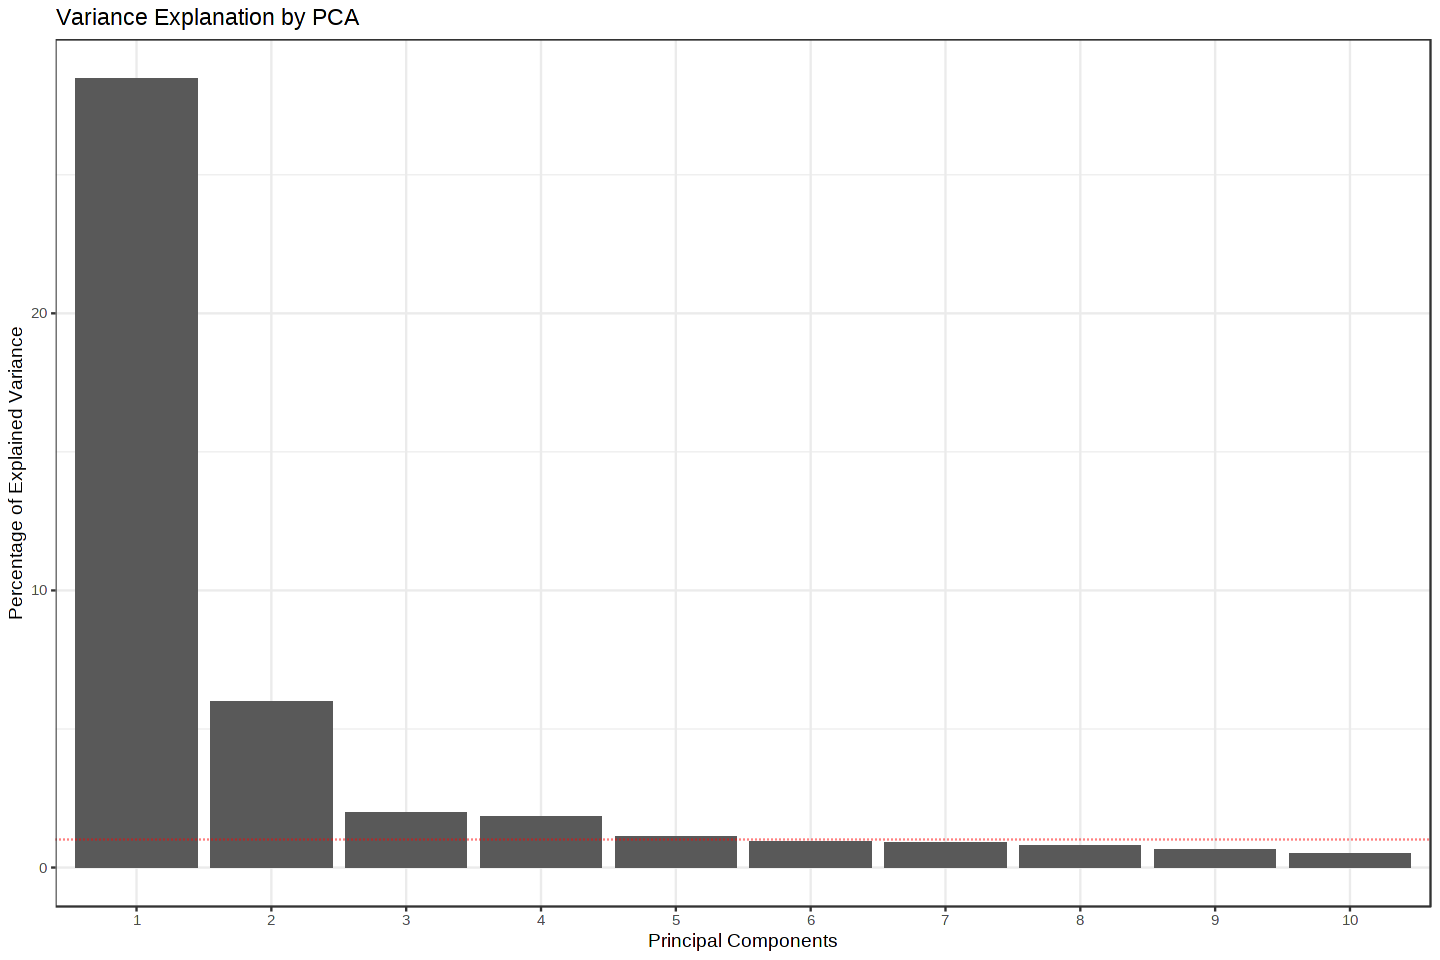

In [ ]:
# Plot variance explained by each PC
pca.data[1:10,] %>%
  ggplot(aes(x=PC, y=percVar)) +
  geom_bar(stat='identity') +
  geom_hline(yintercept = 1, colour="red", linetype=3) +
  labs(title="Variance Explanation by PCA") +
  xlab("Principal Components") +
  ylab("Percentage of Explained Variance") +
  theme_bw()
# save plot
#ggsave("Figures/pca_var_explained.png")

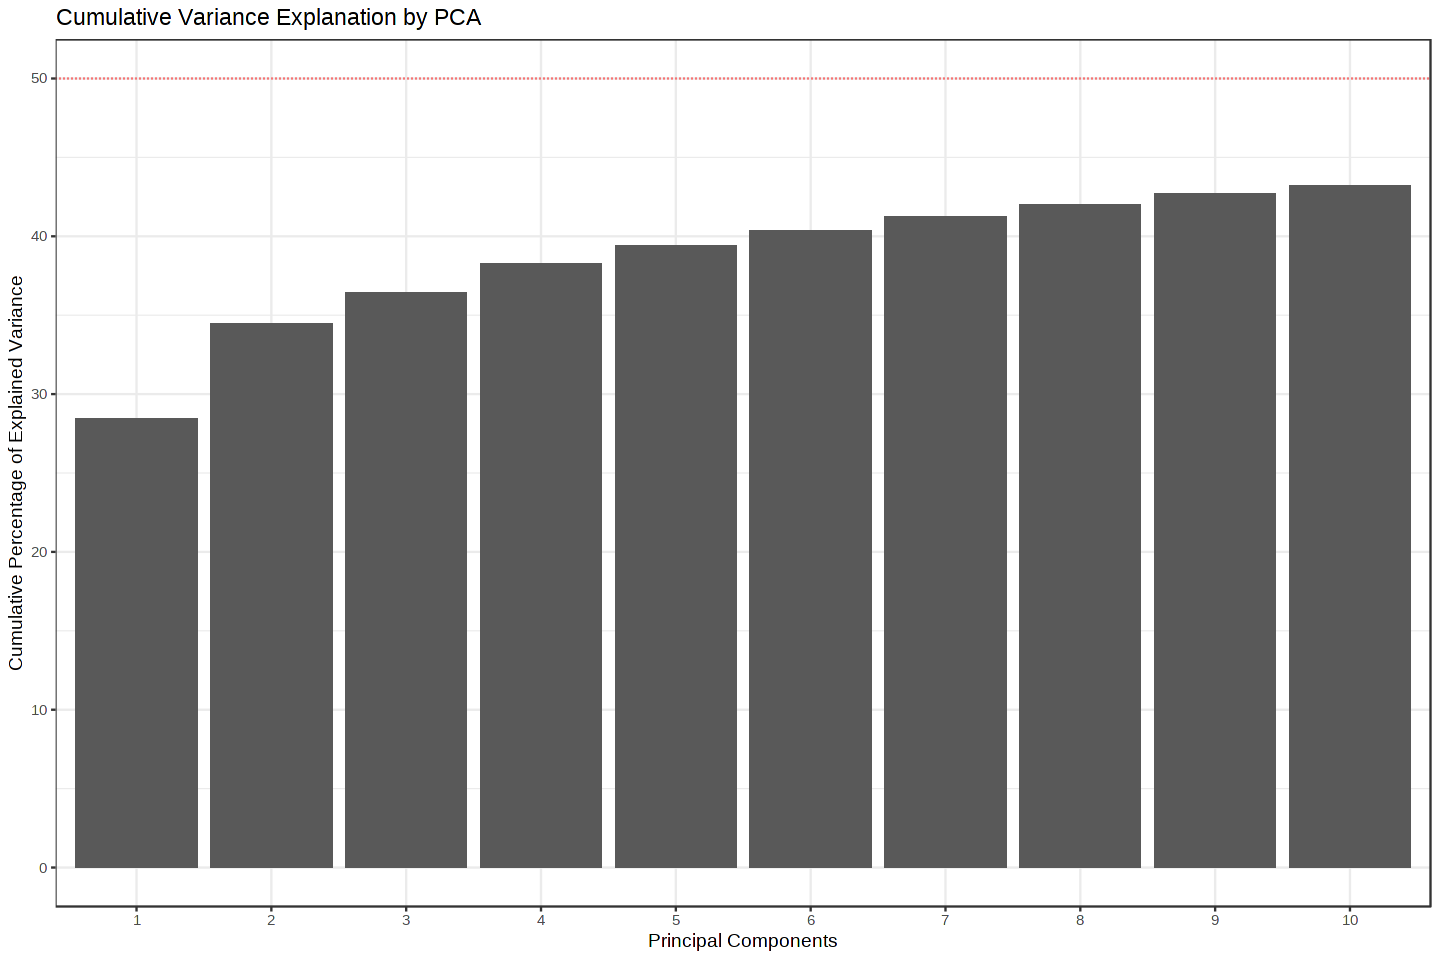

In [ ]:
# Plot cumulative variance explained
pca.data[1:10, ] %>%
  ggplot(aes(x = PC, y = cumulVar)) +
  geom_bar(stat = 'identity') +
  geom_hline(yintercept = 50, color = "red", linetype = 3) +
  labs(title = "Cumulative Variance Explanation by PCA", x = "Principal Components", y = "Cumulative Percentage of Explained Variance") +
  theme_bw()
# Save plot
#ggsave("Figures/pca_cumulative_var_explained.png")

Look that we can't see clear groups, it seems the PC1 is accounting for the overall signal per cell. While the other PC seem to be measuring the relative expression of different genes.

If PC1 is just the total signal per cell maybe we can visualize that directly.

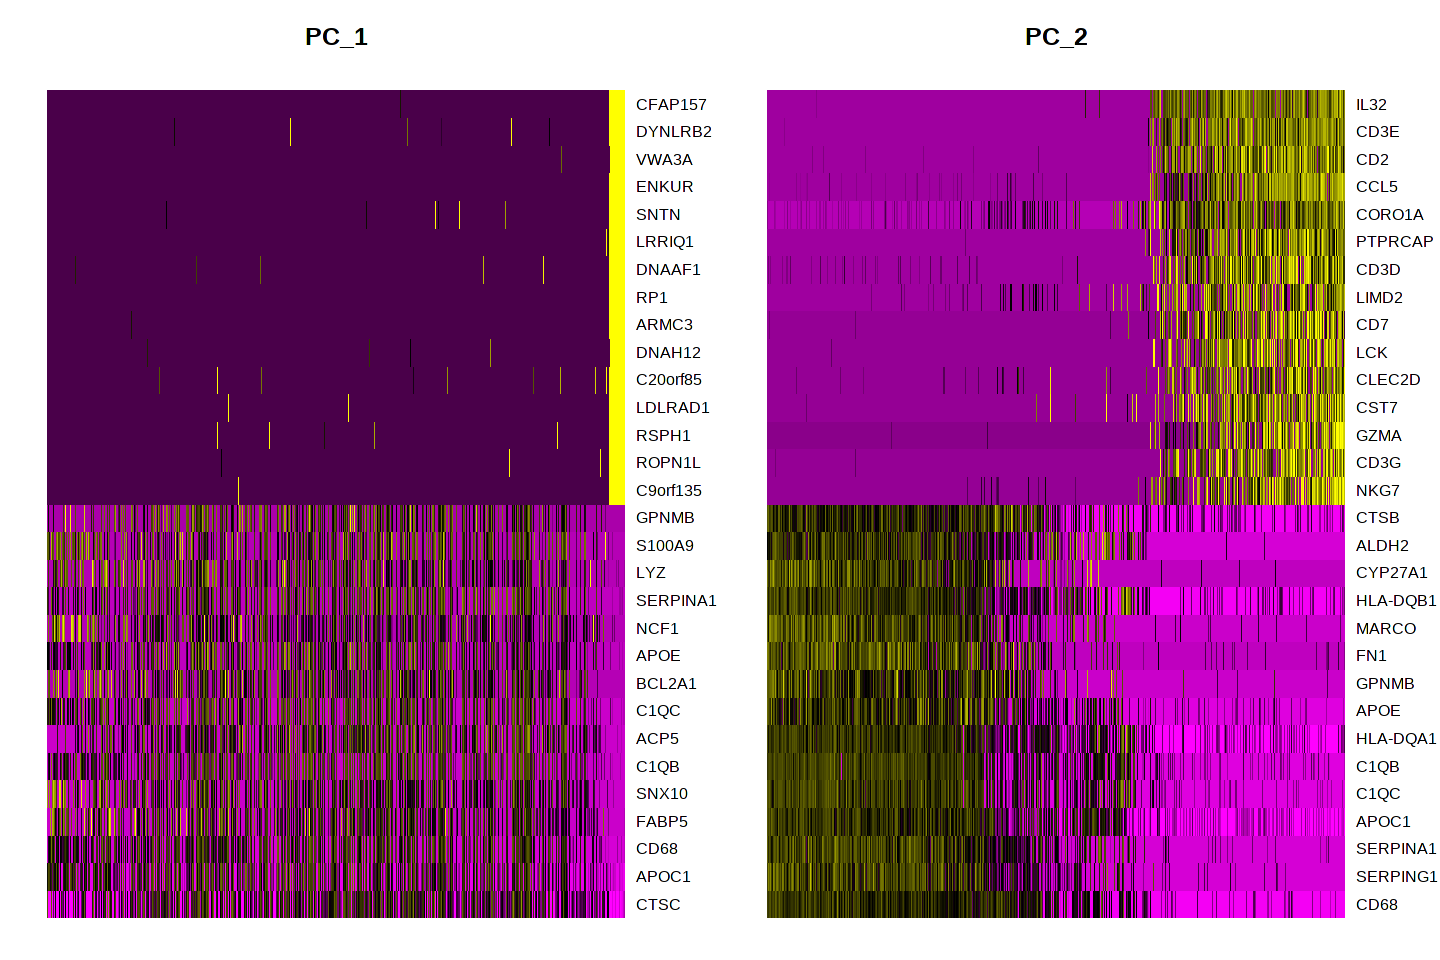

In [ ]:
#png("Figures/heatmap_pc1_pc2.png")
DimHeatmap(sampleA, dims = 1:2)
#dev.off()

It appears that **PC1** just has postive weights from a bunch of genes.  This suggests it isn't balancing expression of different gene sets, it's just measuring overall signal.  What do other PCs look like?

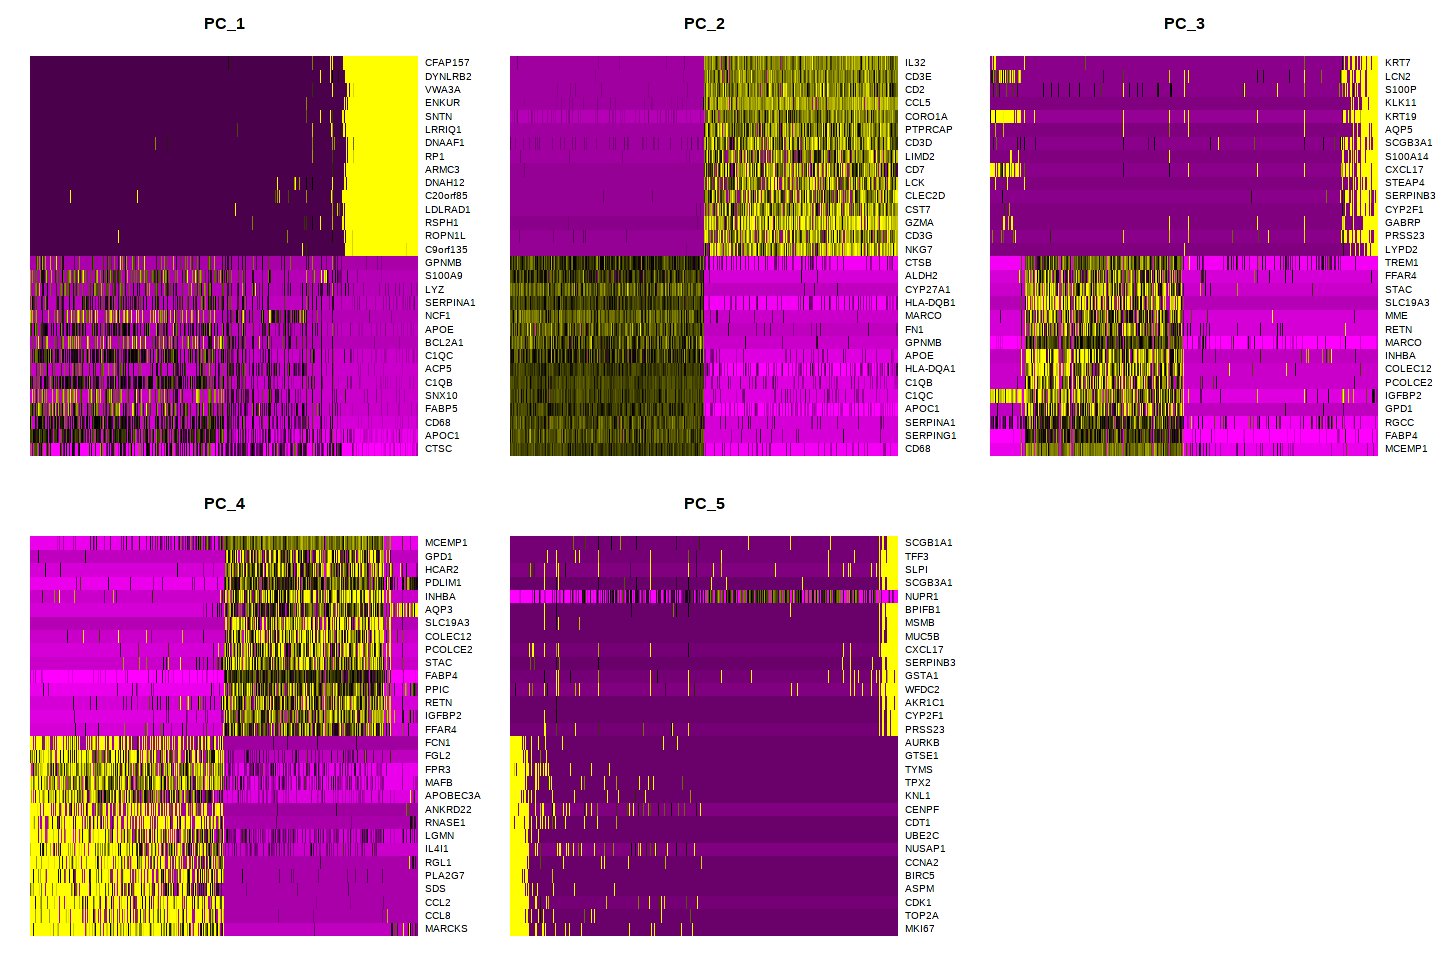

In [ ]:
#pdf("Figures/heatmap_pc1_to_pc5.pdf", width = 16, height = 10)
DimHeatmap(sampleA, dims = 1:5, cells = 500, balanced=T)
#dev.off()

The other PCs instead do seem to be measuring the relative expression of
different genes. If PC1 is just the total signal per cell maybe we can
visualize that directly.

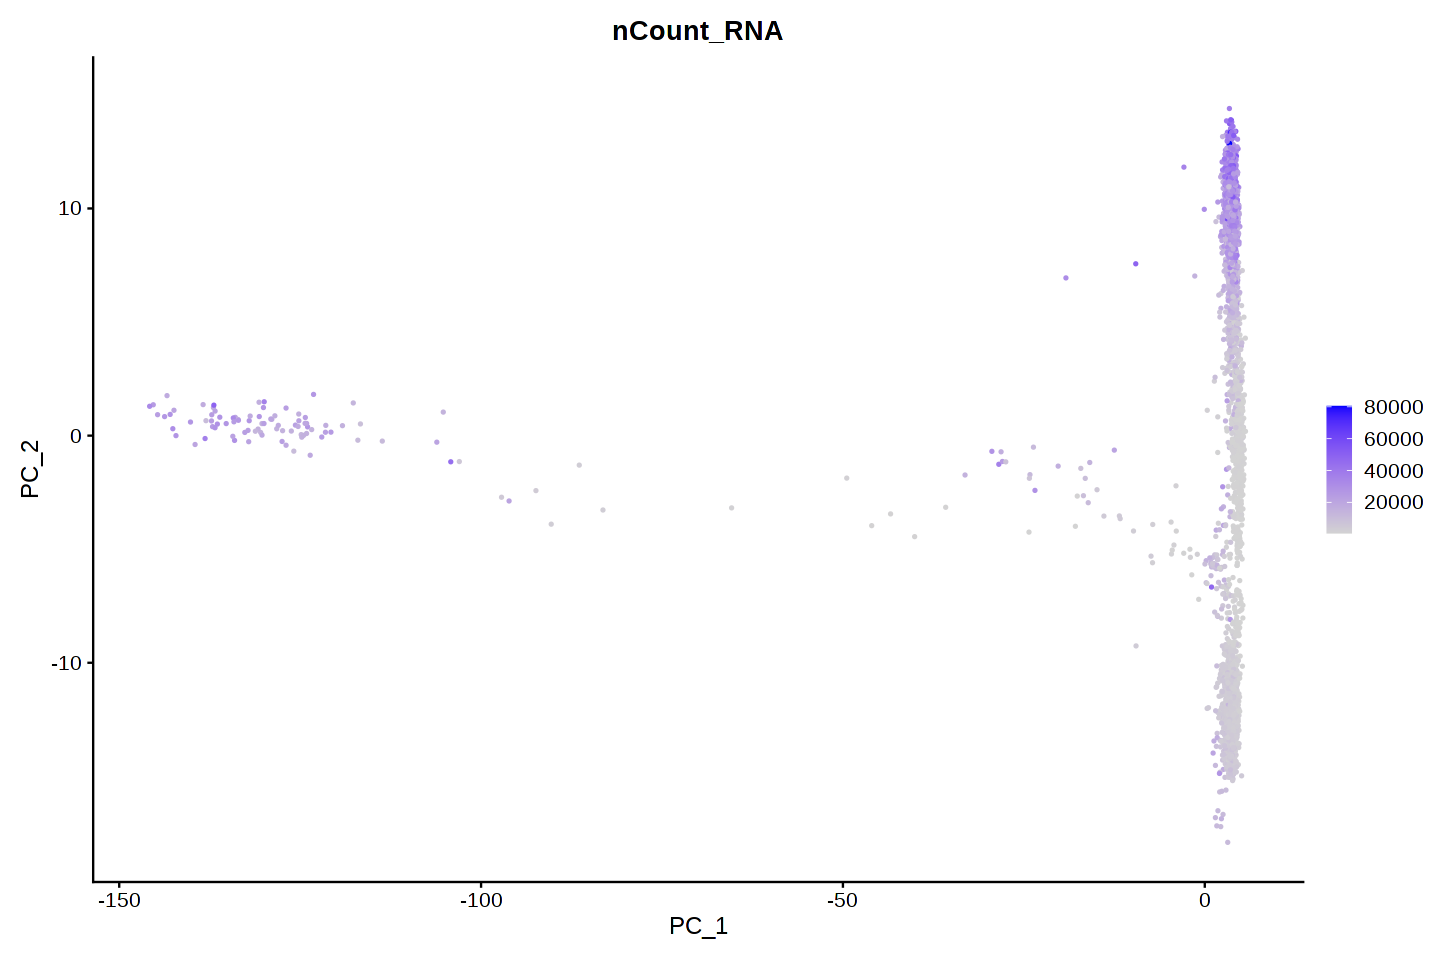

In [ ]:
scPlot <- FeaturePlot(sampleA, features="nCount_RNA")
scPlot
#ggsave("Figures/FeaturePlot_nCount_RNA.png")

Now, we can check the reductions.

In [ ]:
sampleA@reductions

$pca
A dimensional reduction object with key PC_ 
 Number of dimensions: 50 
 Number of cells: 3547 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 


How many PC we need to obtain a good representation of the variability of the data.

In [ ]:
length(sampleA@reductions$pca)

[1] 50

Saving 7 x 7 in image


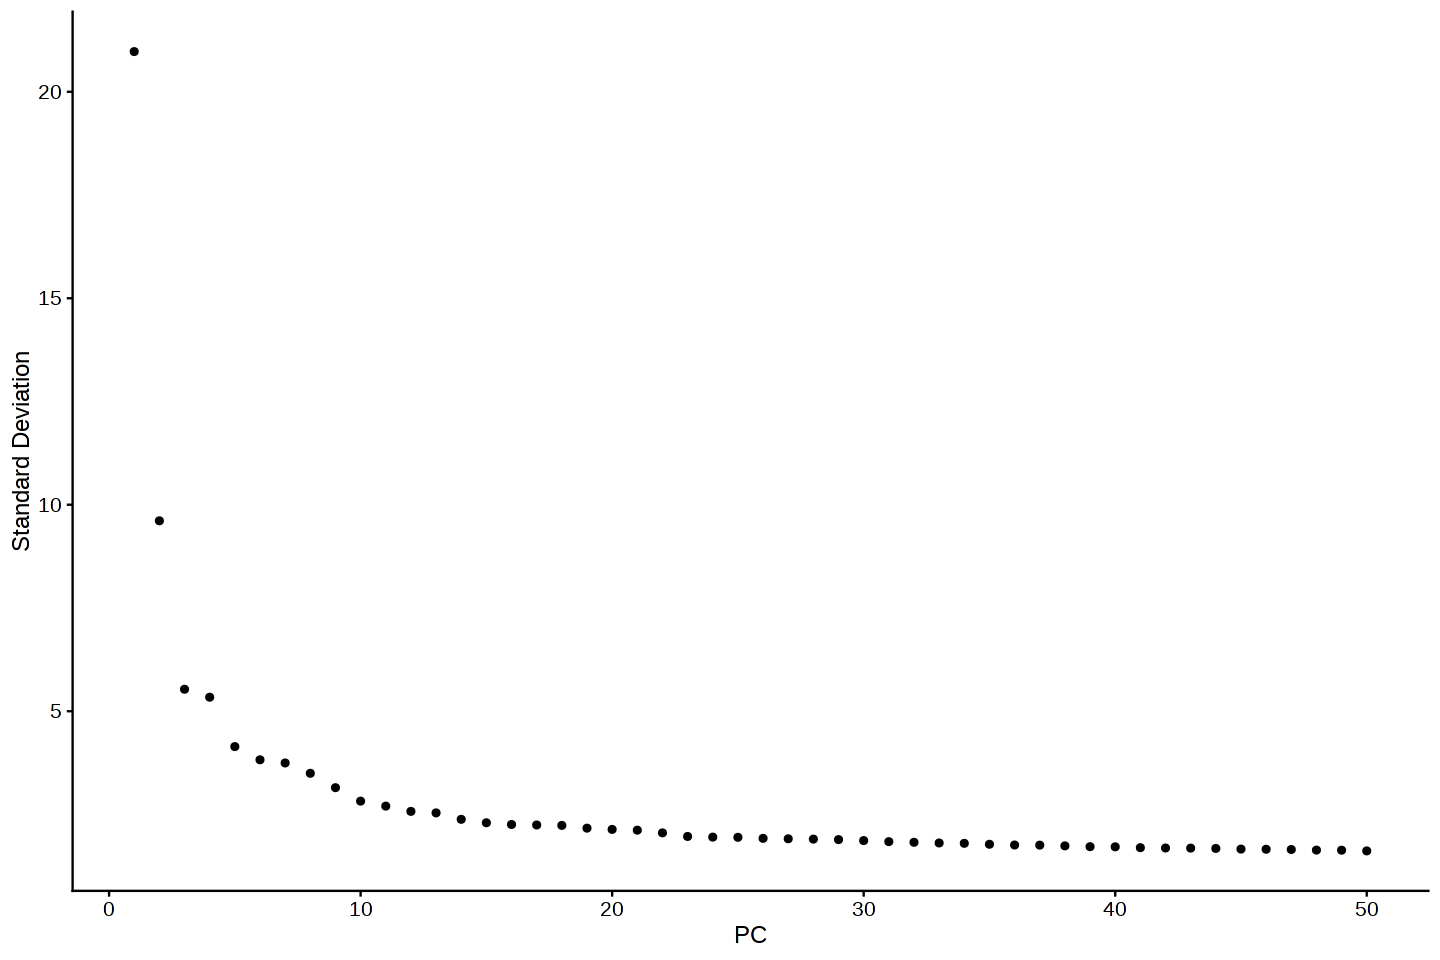

In [ ]:
ElbowPlot(sampleA, ndims=50)
ggsave("Figures/ElbowPlot.png")

The RunPCA function currently calculates only the top 50 principal components (PCs). If we want to explore additional principal components, we need to recalculate them by re-running the PCA analysis.

It's important to note that there isn't a definitive cutoff for the number of PCs to use; in fact, it's uncommon to find a clear threshold. Not all of the top 50 PCs are necessarily essential for our analysis, we can see that the curve reaches a plateau betwee the 10-20 range.  Let's use the top 15 PCs.

##UMAP


PCA has the benefit of being a linear transformation, making it easily interpretable and meaningful. However, this linearity can be a limitation for visualization. Uniform Manifold Approximation and Projection (UMAP) is a newer, nonlinear method that has become popular in the single-cell community for its ability to reveal complex structures in the data.

While UMAP can be calculated using the full original dimensional space, performing initial dimensionality reduction with PCA can speed up the calculations and help remove noise from the distance metrics. Let's explore UMAP.

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


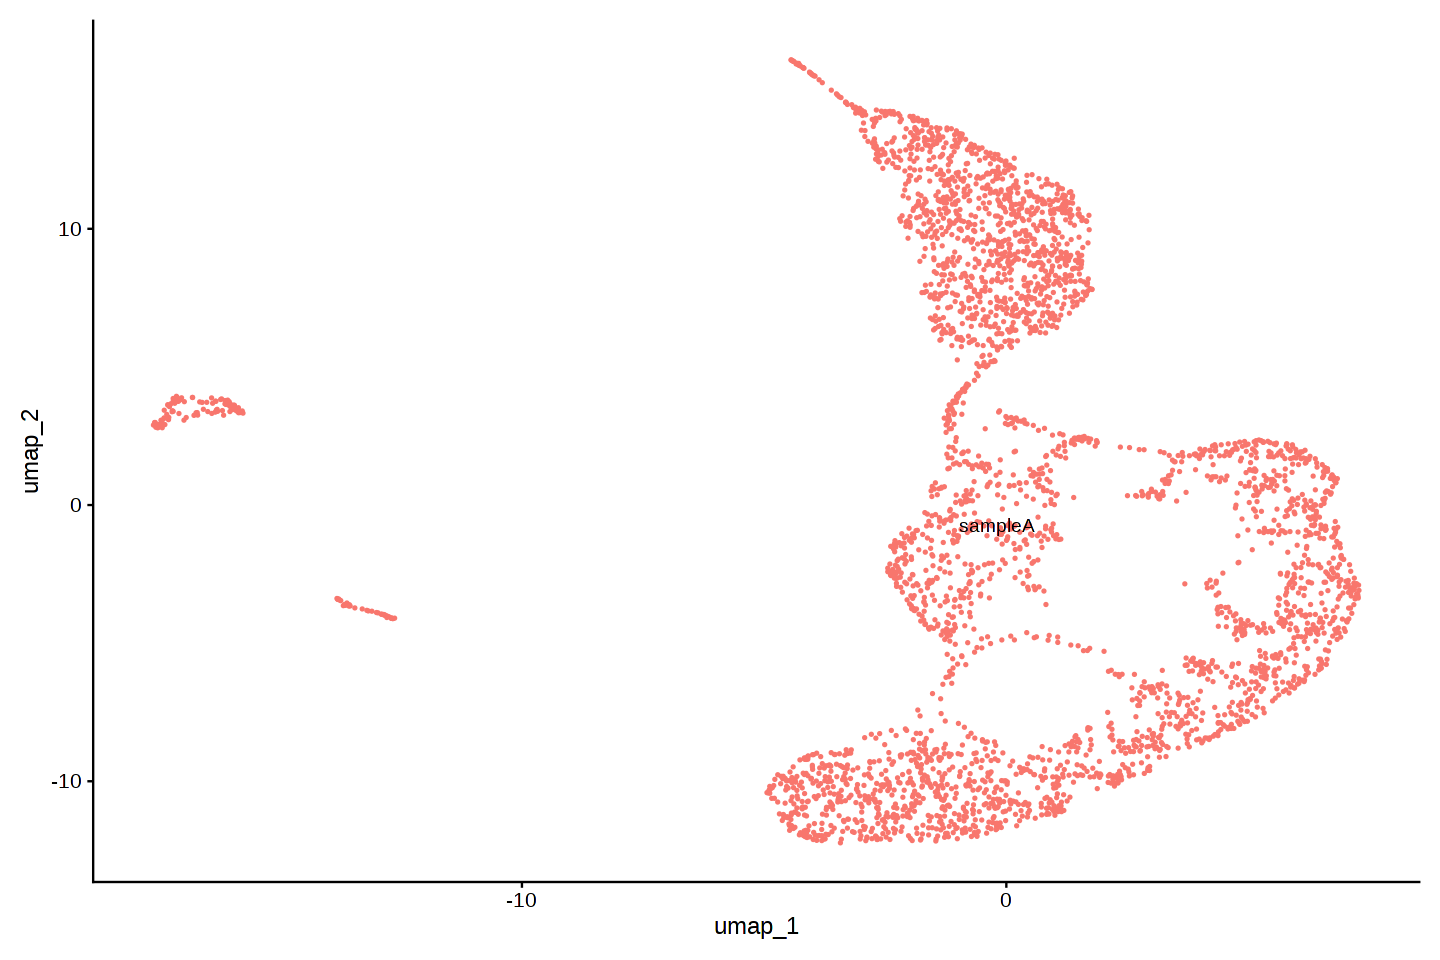

In [ ]:
# Perform UMAP and visualize clusters
sampleA <- RunUMAP(sampleA, dims=1:5, verbose=F)
plot1 <- DimPlot(sampleA, label=T) + NoLegend()
plot1
#ggsave("Figures/UMAP_15PC.png",plot = plot1, bg = 'white')

Before proceeding with the analysis, it is essential to verify that the patterns we are seeing are reflec of the biological variability and not due to technical issues or contamination during data processing.

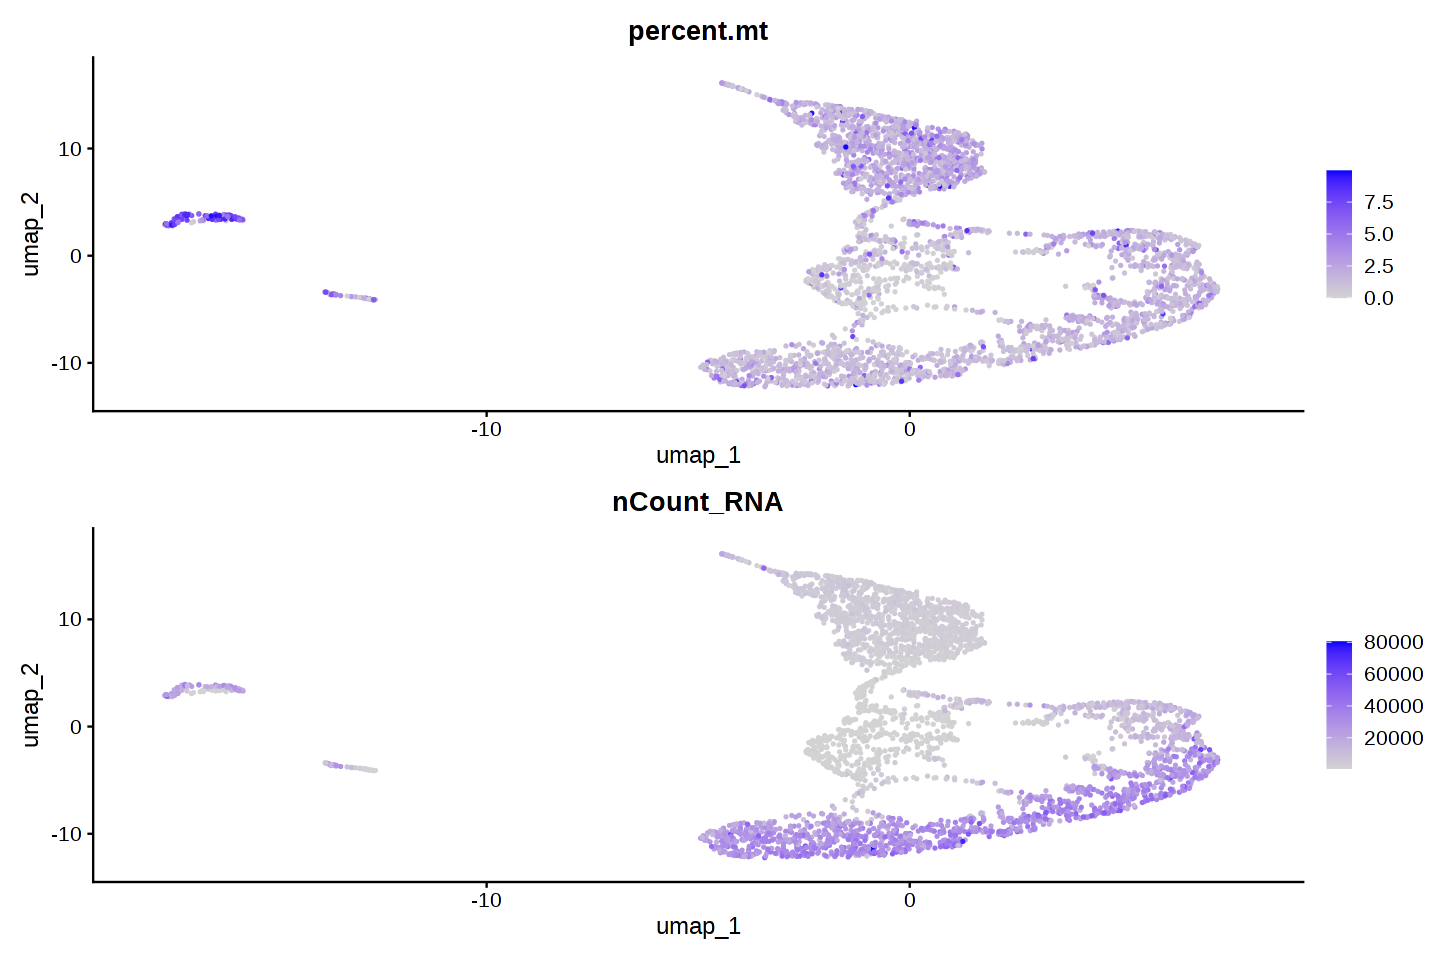

In [ ]:
plot1 <- FeaturePlot(sampleA, features=c("percent.mt"))
plot2 <- FeaturePlot(sampleA, features=c("nCount_RNA"))
combined_plot = plot1 + plot2
print(combined_plot)

#ggsave("Figures/FeaturePlot_nCount_percentMT.pdf", plot = combined_plot, width = 8, height = 12)

We can see that neither percent mitochronrial reads or total UMI per cell are dominating any of the structure we see in the UMAP.

If we are interested in some specific genes we can also plot their cell expression in the UMAP.

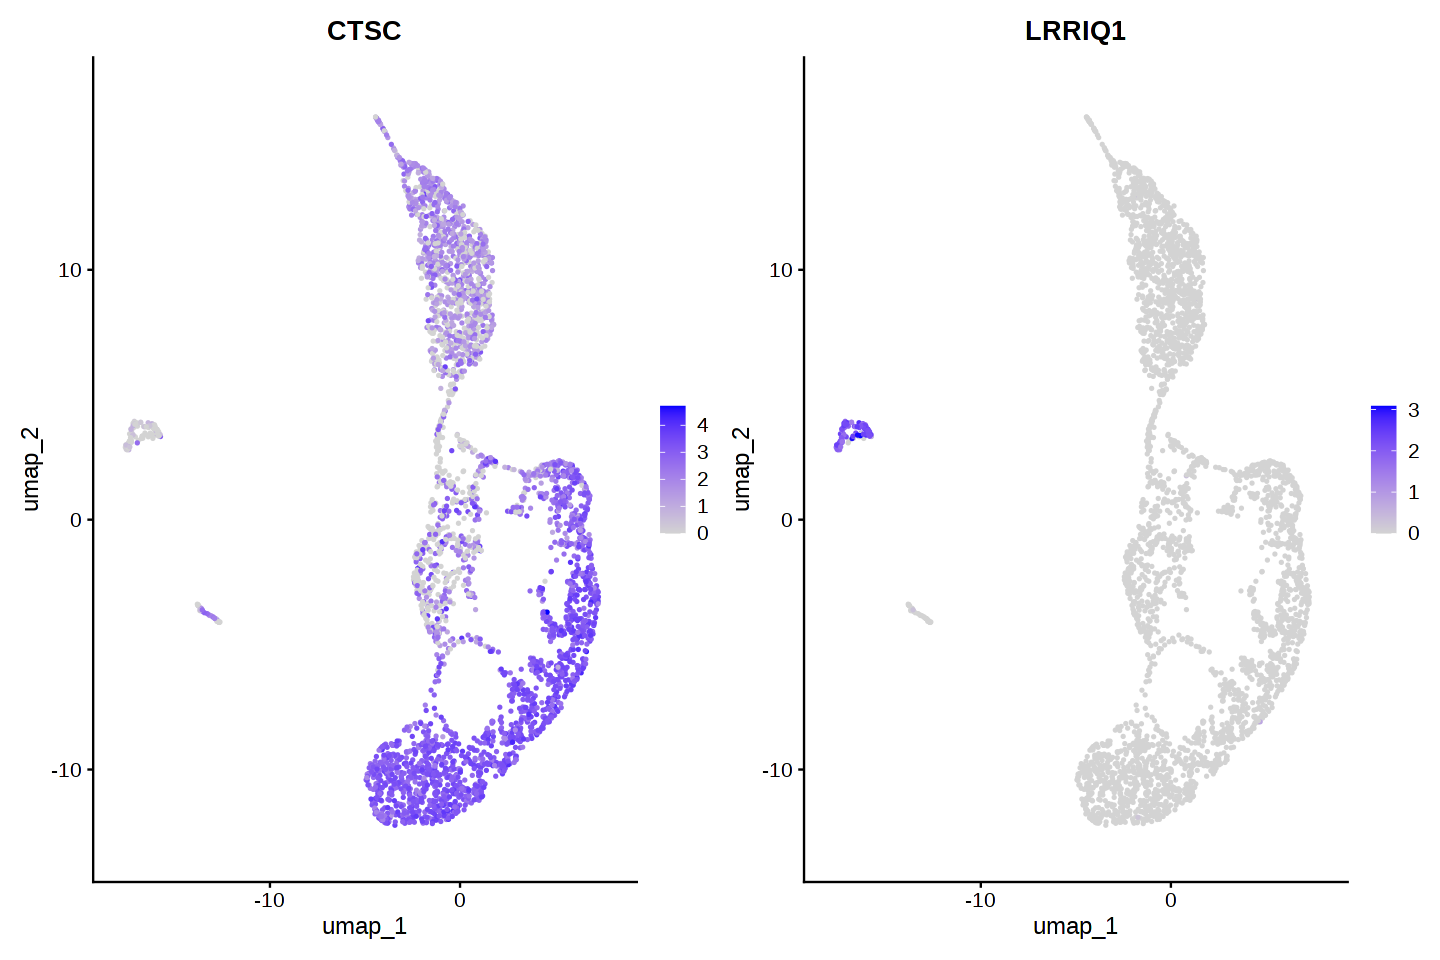

In [ ]:
FeaturePlot(sampleA, features=c("CTSC", "LRRIQ1"))
#ggsave("Figures/FeaturePlot_CTSC_LRRIQ1.pdf", plot = plot1)

In [ ]:
#saveRDS(sampleA, "GSM4339770_analysis/GSM4339770_dimensional_reduction.rds")

# **6. CLustering**

At this stage, we have a solid representation of the data, but we still need to identify which cells are more similar to each other so we can assign meaningful labels to them. To achieve this, we will utilize a nearest-neighbor graph representation combined with the Louvain algorithm to detect clusters or communities within the graph. This method performs well in high-dimensional data because it relies on local relationships (the nearest neighbors) rather than global ones (all points). As a result, it tends to remain more stable and meaningful compared to distances between all points, which can become less informative.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3547
Number of edges: 119936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8975
Number of communities: 11
Elapsed time: 0 seconds


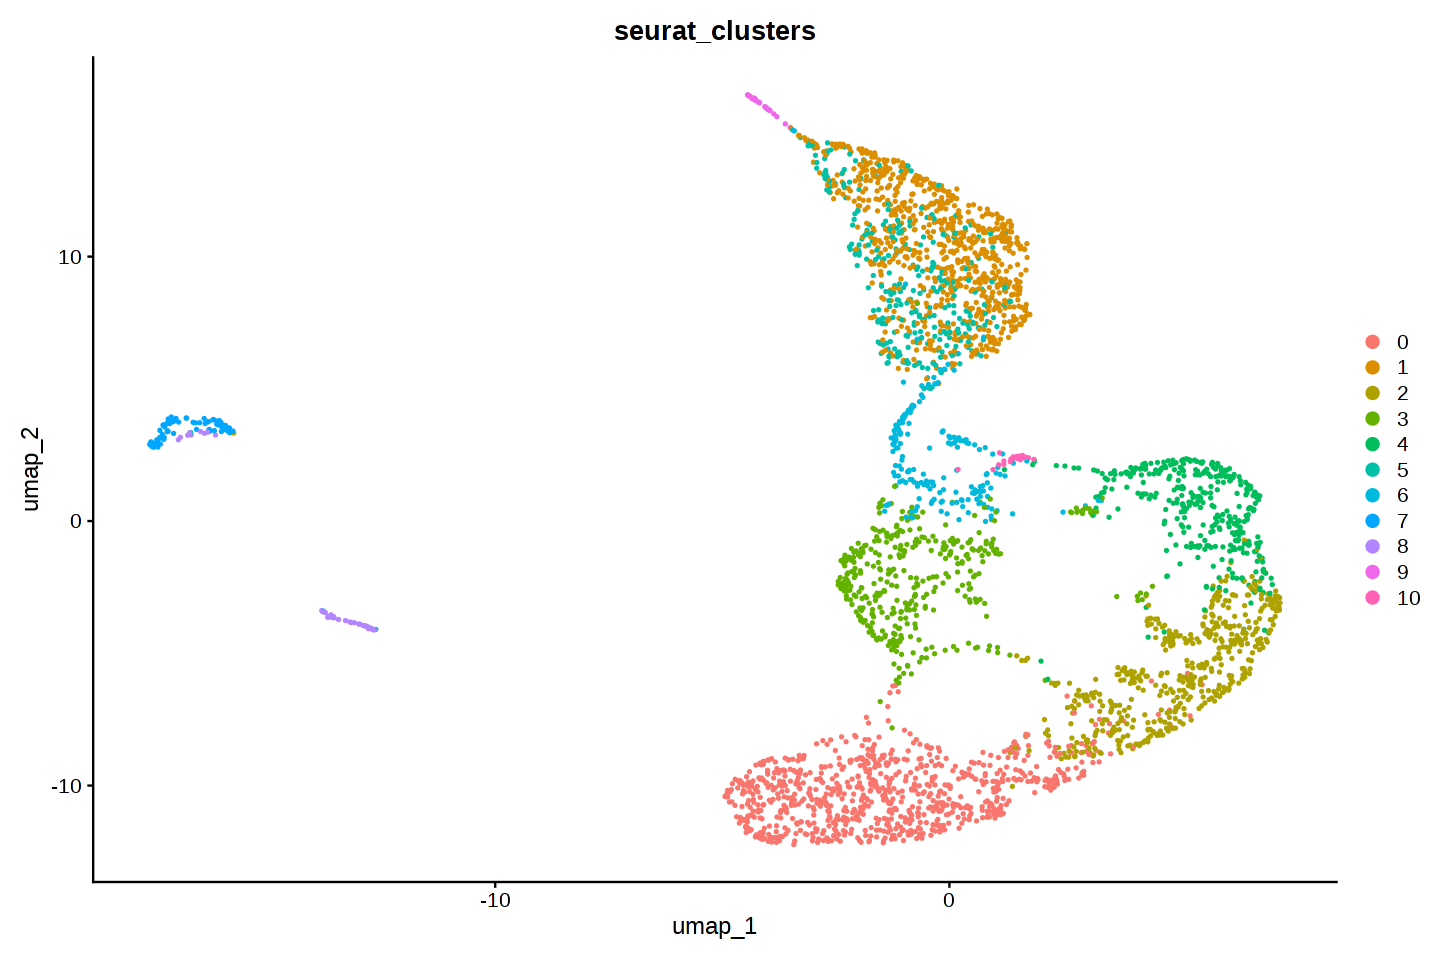

In [ ]:
# Find the nearest neighbors with the first 15 dimensions
sampleA <- FindNeighbors(sampleA, dims = 1:15)

# Perform clustering using the Louvain algorithm
sampleA <- FindClusters(sampleA, resolution = 0.5)

# Visualize the clusters using UMAP
DimPlot(sampleA, reduction = "umap", group.by = "seurat_clusters")
#ggsave("Figures/UMAP_clusters_resolution_0_5.pdf")

The Louvain algorith offer to us several parameter to modify, one of the most importants in the resolution, this parameters influences the number and size of detected communities. The lower (higher) values for resultion, the lower (higher) numbers of clusters. Let's explore this.

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3547
Number of edges: 119936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9935
Number of communities: 3
Elapsed time: 0 seconds


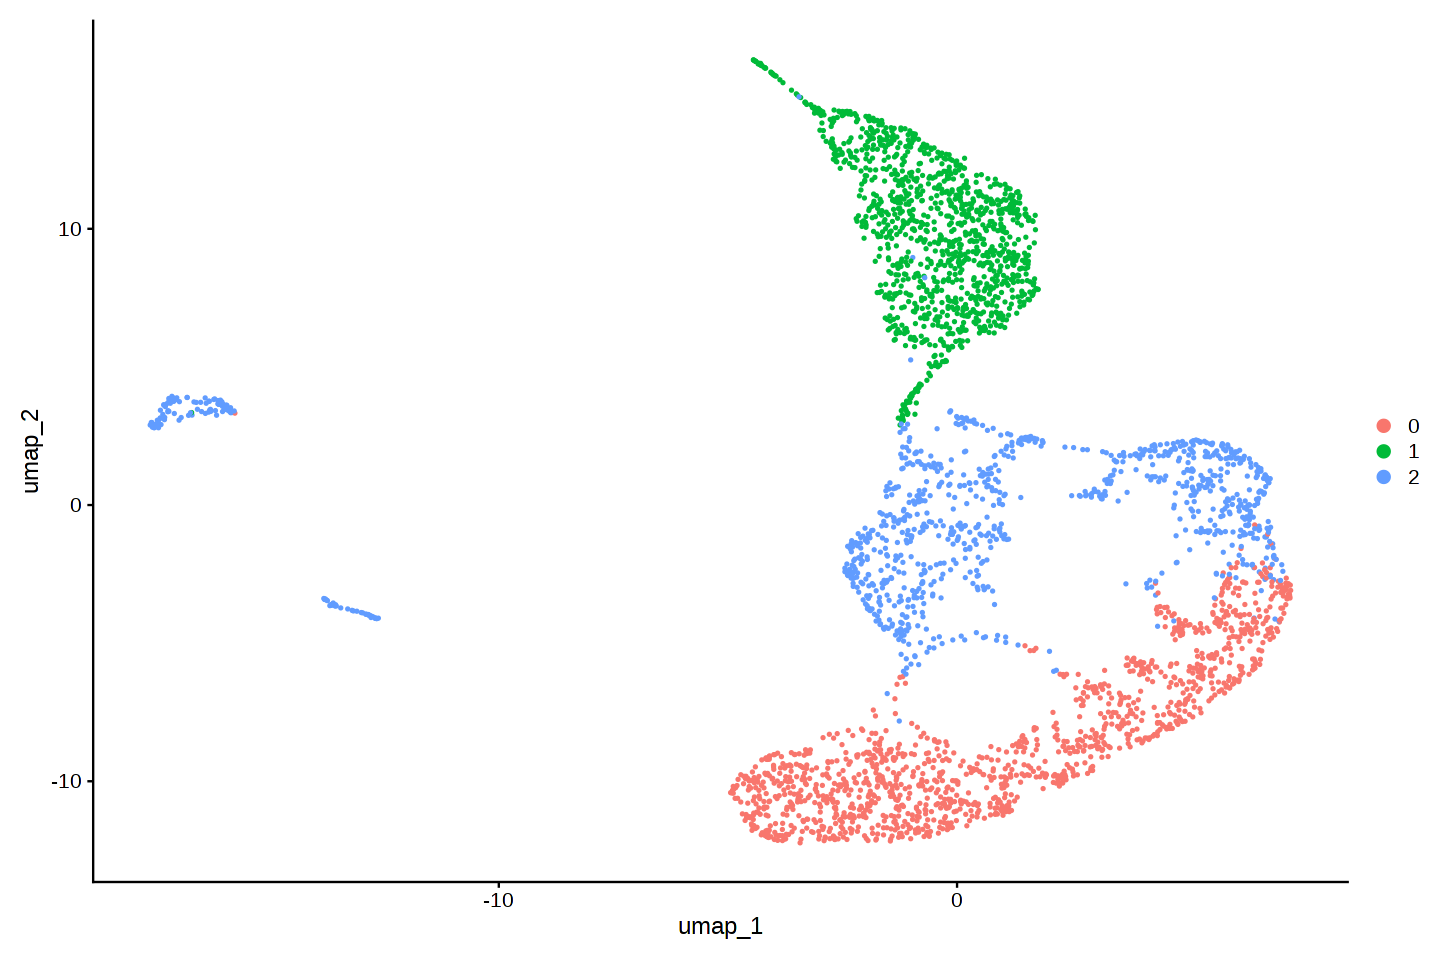

In [ ]:
sampleA <- FindClusters(sampleA, resolution=0.01)
plot1 = DimPlot(sampleA, reduction="umap")
print(plot1)

# Save plot
#ggsave("Figures/UMAP_clusters_resolution_0_01.pdf", plot = plot1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3547
Number of edges: 119936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9668
Number of communities: 7
Elapsed time: 0 seconds


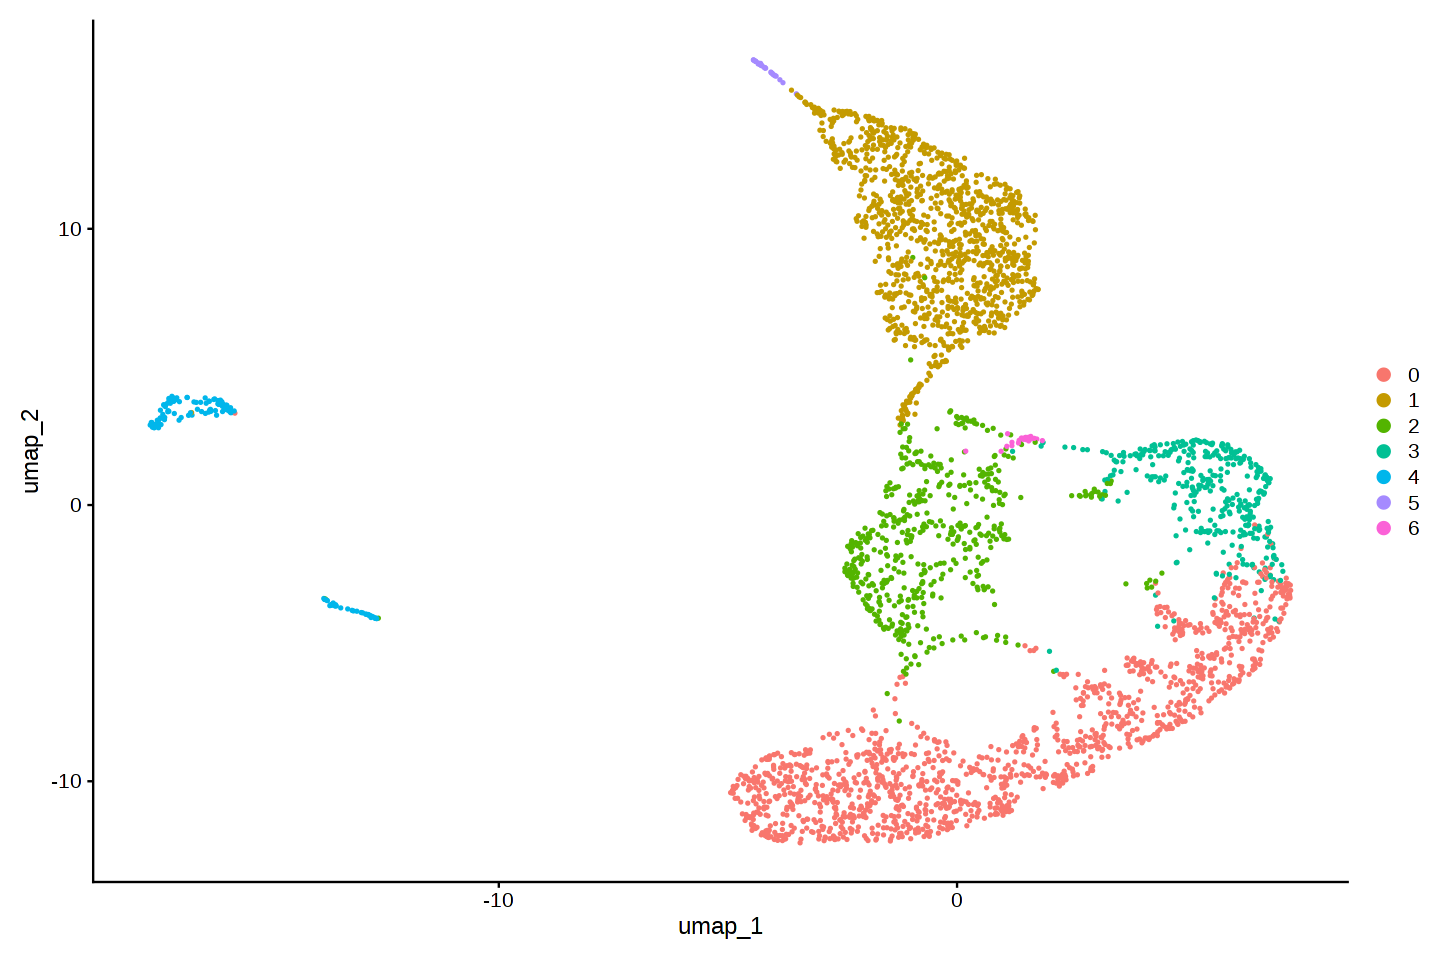

In [ ]:
sampleA <- FindClusters(sampleA, resolution=0.1)
plot1 = DimPlot(sampleA, reduction="umap")
print(plot1)

# Save plot
#ggsave("Figures/UMAP_clusters_resolution_0_1.pdf", plot = plot1)

All clusters calculus are saved in metadata.

In [ ]:
head(sampleA[[]])

orig.ident nCount_RNA nFeature_RNA percent.mt doublet_score
AAACCTGAGTGAACGC-1 sampleA     4277      1438         2.244564   0.0011192646 
AAACCTGGTGAGGCTA-1 sampleA     3771      1688         1.829753   0.0001501217 
AAACCTGTCACCATAG-1 sampleA    26718      4372         1.972453   0.0003771290 
AAACCTGTCCACGCAG-1 sampleA    25396      4953         2.457080   0.0304813217 
AAACGGGAGCTGAAAT-1 sampleA     2759      1409         4.131932   0.0013843344 
AAACGGGAGGTGGGTT-1 sampleA     4176      1656         2.179119   0.0002913584 
                   doublet_label RNA_snn_res.0.5 seurat_clusters
AAACCTGAGTGAACGC-1 singlet       1               1              
AAACCTGGTGAGGCTA-1 singlet       1               1              
AAACCTGTCACCATAG-1 singlet       2               0              
AAACCTGTCCACGCAG-1 singlet       0               0              
AAACGGGAGCTGAAAT-1 singlet       1               1              
AAACGGGAGGTGGGTT-1 singlet       1               1              
                   RNA_snn_res.0.01 RNA_snn_res.0.1
AAACCTGAGTGAACGC-1 1                1              
AAACCTGGTGAGGCTA-1 1                1              
AAACCTGTCACCATAG-1 0                0              
AAACCTGTCCACGCAG-1 0                0              
AAACGGGAGCTGAAAT-1 1                1              
AAACGGGAGGTGGGTT-1 1                1

If we want a graphical representation we can use the package "clustree" that let us to see which clusters has been constructed for each value of resolution.

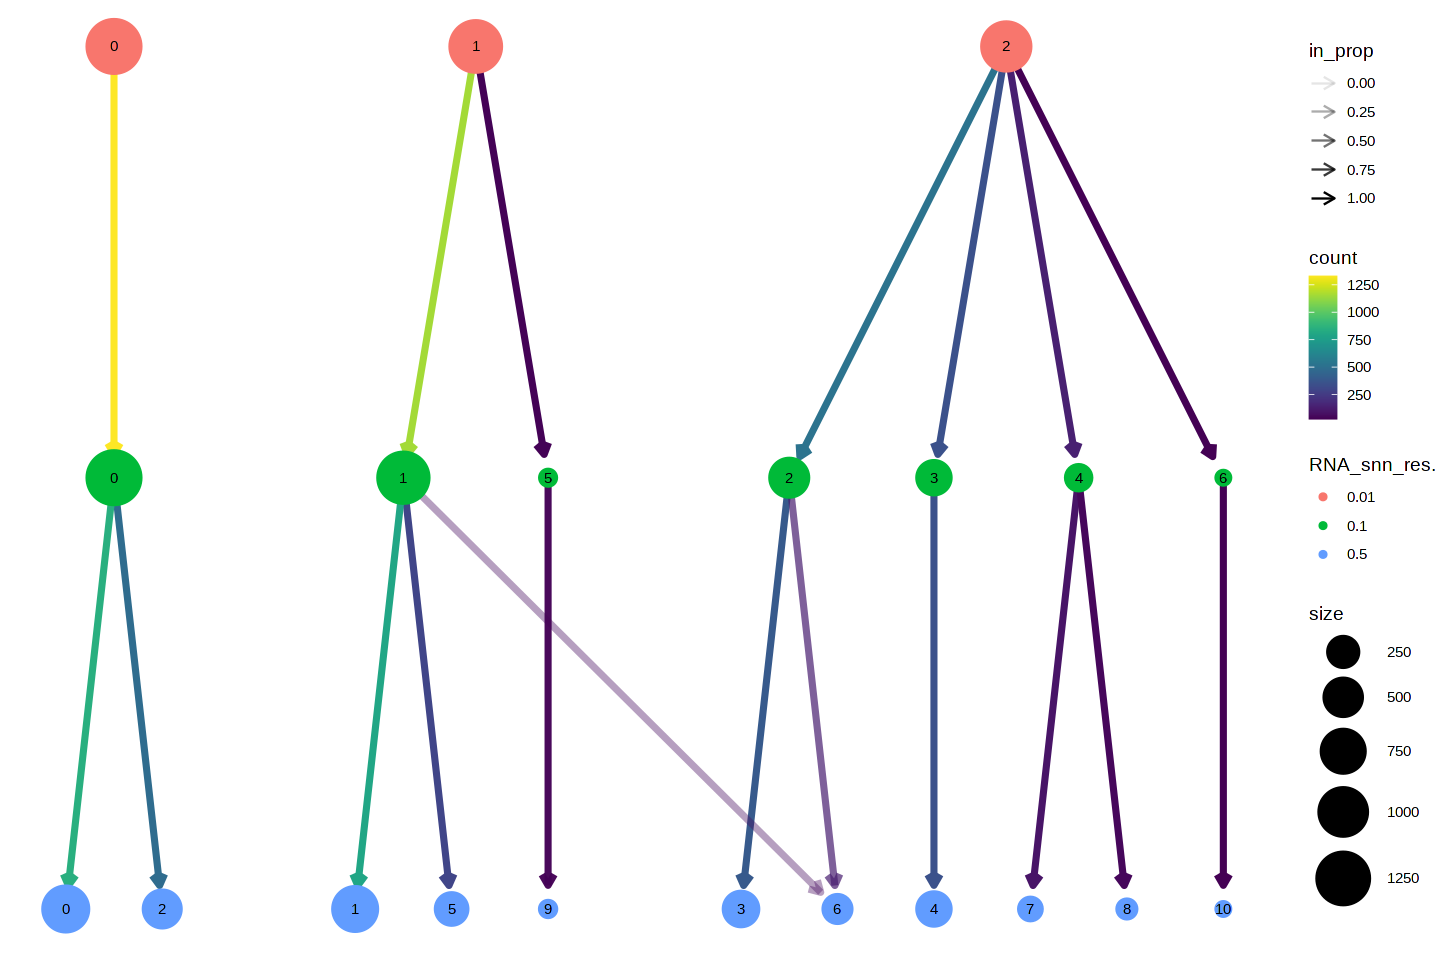

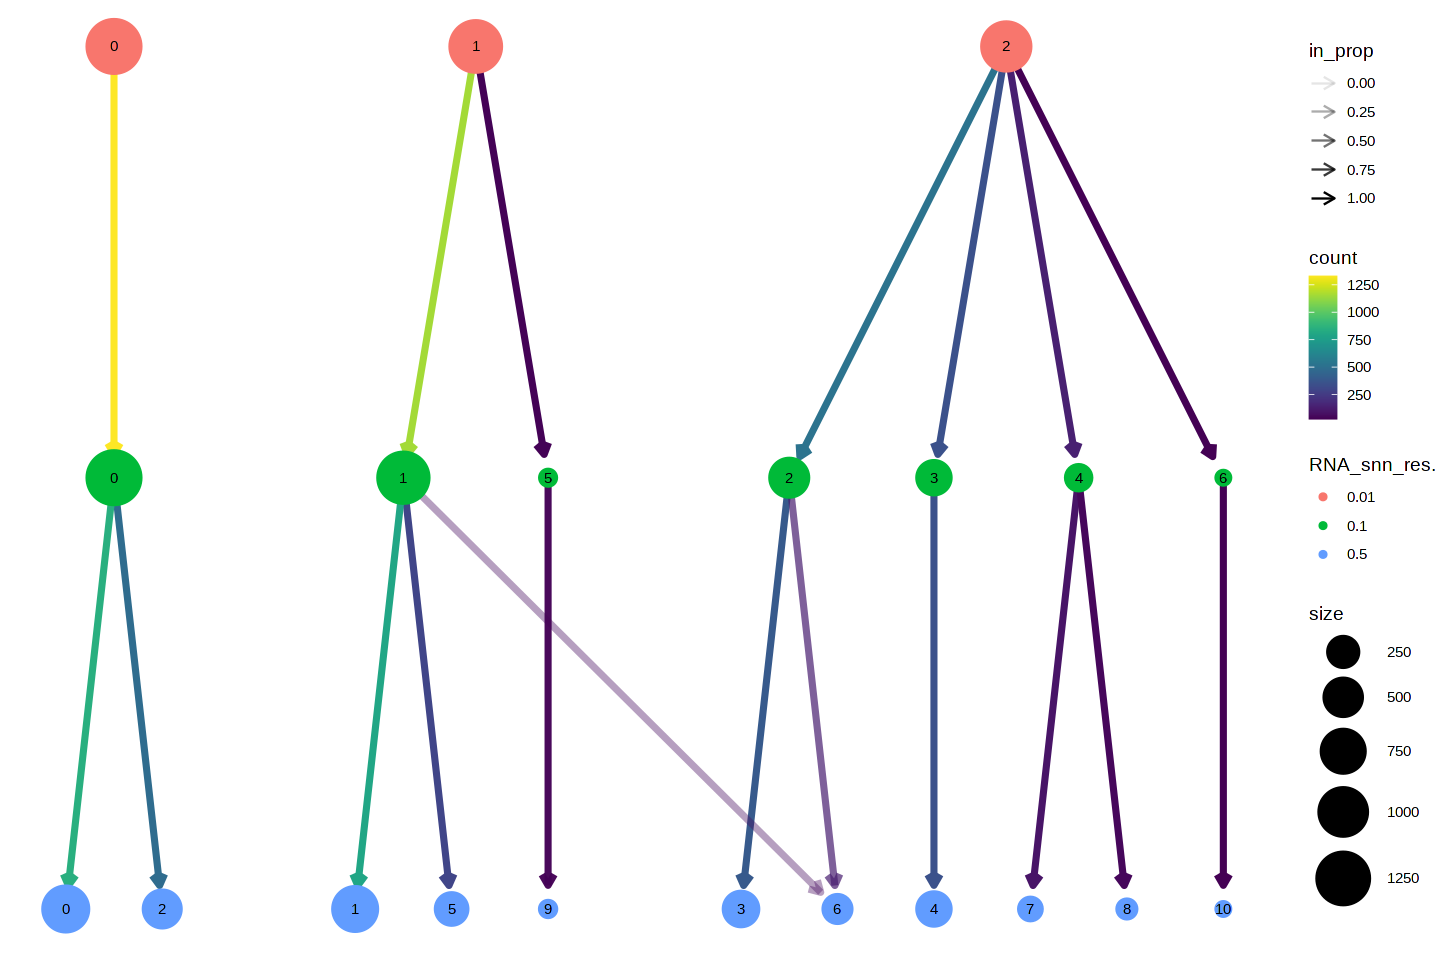

In [ ]:
clustree(sampleA,prefix="RNA_snn_res.")
plot1 = clustree(sampleA,prefix="RNA_snn_res.")
print(plot1)

# Save plot
#ggsave("Figures/ClusTree.pdf", plot = plot1, width = 6, height = 10)

We can examine specific genes in each cluster to better understand them. For example, if we are familiar with the data, we can directly search for known genes. Some web pages offer list of markers for different cell types as CellxGene. https://cellxgene.cziscience.com/cellguide/CL_0000623

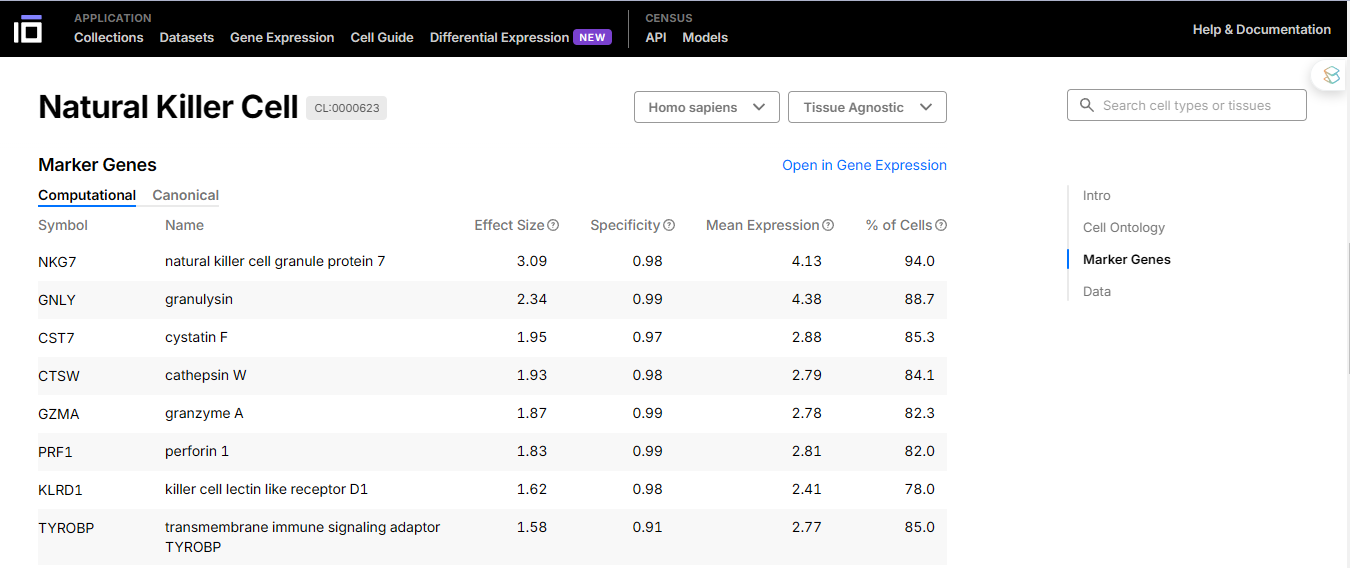

Here we can plot the cell expression of the gen marker NKG7, which is a marker of Natural Killer cells.

Saving 7 x 7 in image


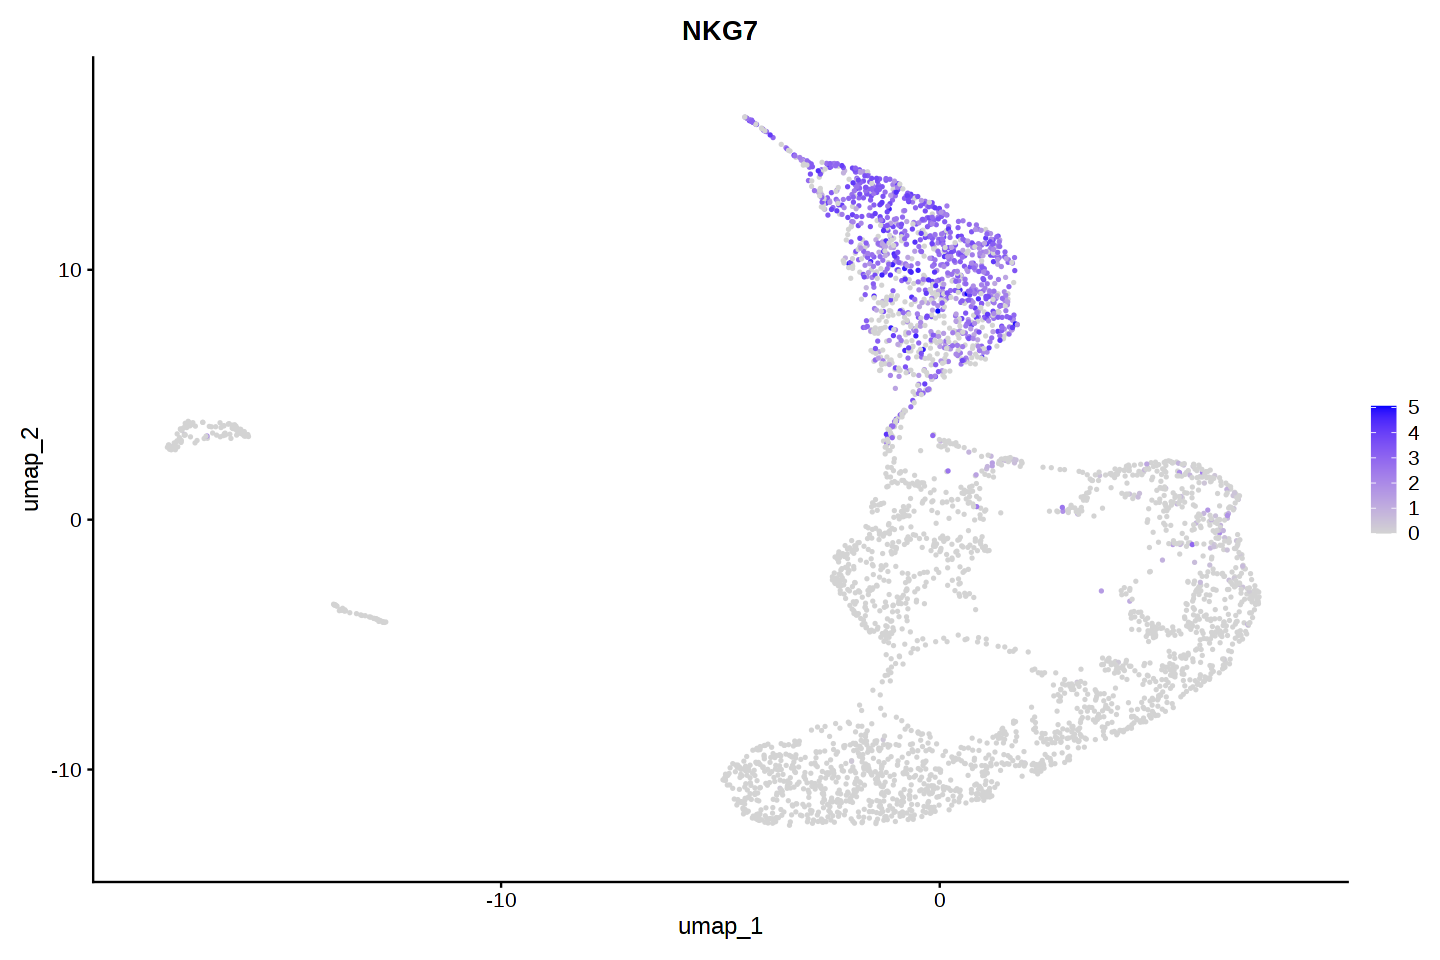

In [ ]:
plot1 = FeaturePlot(sampleA,features="NKG7")
print(plot1)
#ggsave("Figures/FeaturePlot_NKG7.png", plot = plot1)

There are another plots that can help us to understand the data for example the next plots.

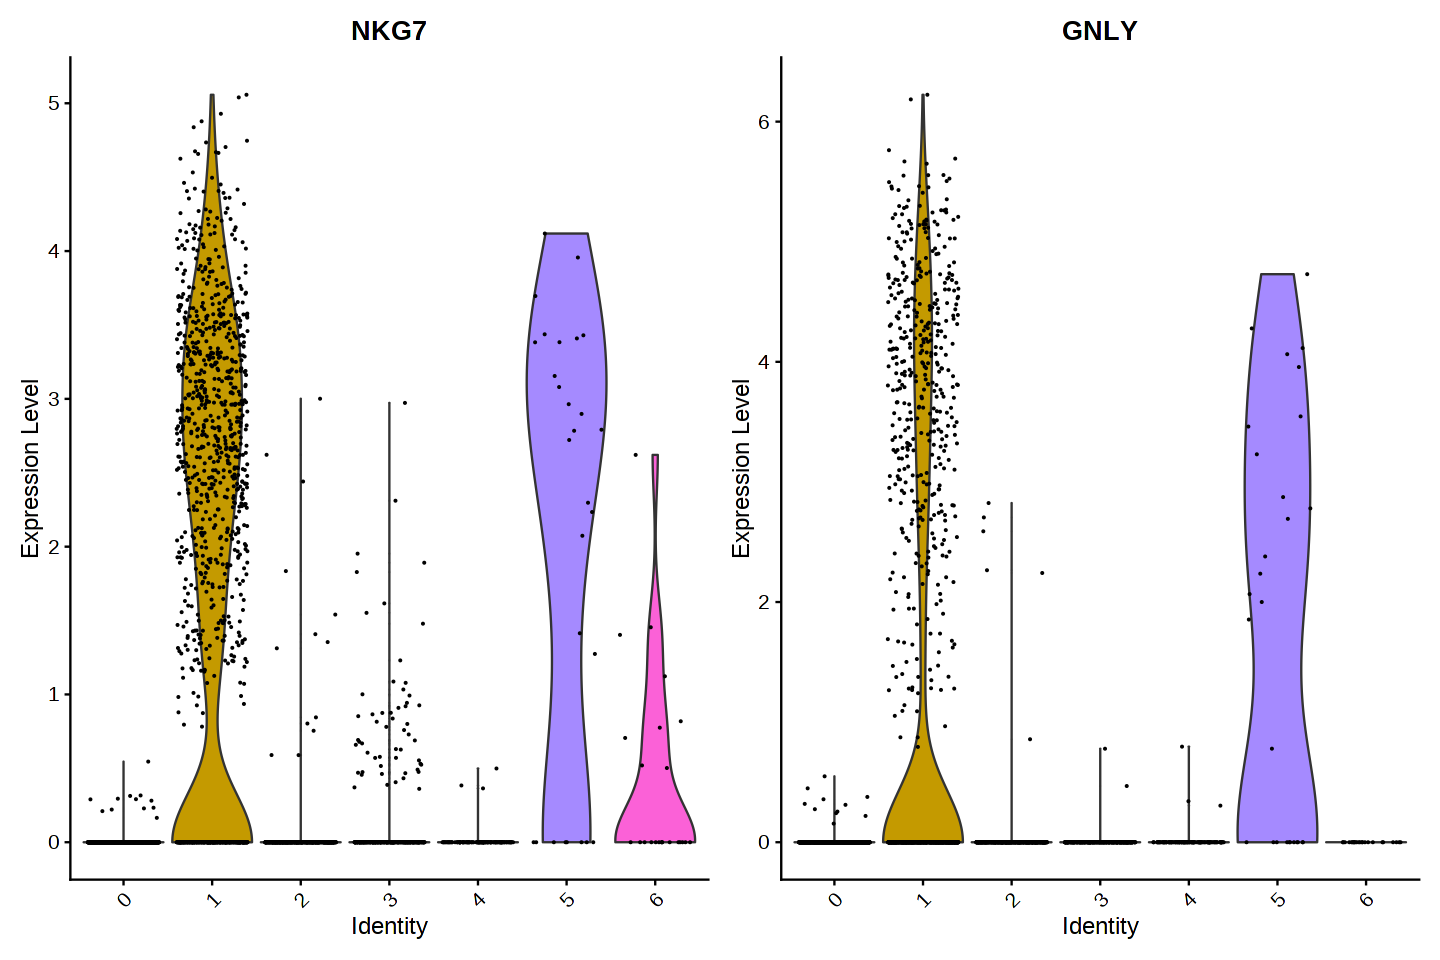

In [ ]:
# Violin plots per cluster
plot1 = VlnPlot(sampleA, features=c("NKG7","GNLY"))
print(plot1)
#ggsave("Figures/ViolinPlot_NKG7_GNL7.png", plot = plot1)

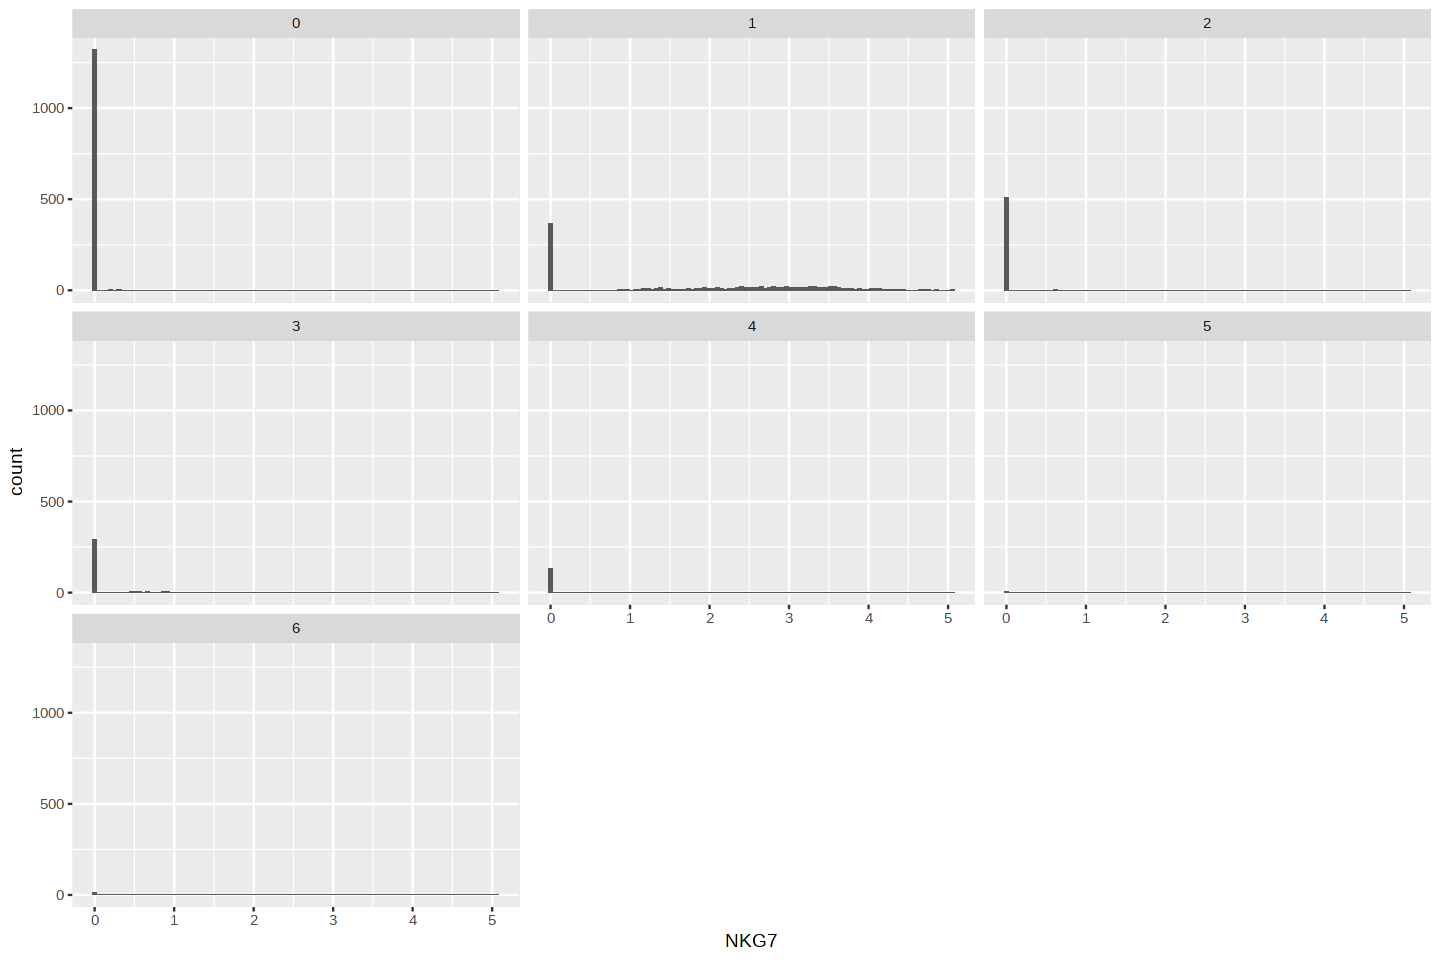

In [ ]:
# Histogram of NKG7 gene expression per cluster
plot1 = sampleA %>%
  FetchData(vars=c("NKG7", "seurat_clusters")) %>%
  ggplot() +
  geom_histogram(aes(x=NKG7), bins=100) +
  facet_wrap(. ~ seurat_clusters)
print(plot1)
#ggsave("Figures/Histogram_NKG7_per_cluster.png", plot = plot1)

This can work with well known markers and well known data. However, in cases where the data is unfamiliar or markers are not defined, we can focus on identifying overexpressed genes to understand the data.

In [ ]:
#saveRDS(sampleA, "GSM4339770_analysis/GSM4339770_clustering.rds")

# **7. Differential Expressio**n

Now, we are going to find differentially expressed genes between some clusters using the function `FindMarkers` of Seurat. By default this fuction uses Wilcoxon Rank Sum Test. For a faster implementation we have installed installed the presto package.

In [ ]:
# Identify positive markers between clusters and visualize results
cluster2vs5 <- FindMarkers(sampleA, ident.1 = 2, ident.2 = 5)

cat("Top differentially expressed genes between cluster 1 and cluster 0:\n")
print(head(cluster2vs5, 20))

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



Top differentially expressed genes between cluster 1 and cluster 0:
               p_val avg_log2FC pct.1 pct.2     p_val_adj
MKI67  3.774651e-112 -11.871892 0.000 0.929 7.536469e-108
CD247  2.693641e-103 -10.255724 0.000 0.857  5.378124e-99
CDK1   2.693641e-103 -10.701497 0.000 0.857  5.378124e-99
CD2    8.406417e-101  -8.482299 0.006 0.929  1.678425e-96
CD3E   8.755405e-101  -6.917802 0.008 0.964  1.748104e-96
ASPM    6.816102e-99 -11.288941 0.000 0.821  1.360903e-94
CD3G    6.816102e-99 -10.753474 0.000 0.821  1.360903e-94
CDT1    7.459590e-95  -9.844728 0.002 0.821  1.489382e-90
PRF1    1.664037e-94 -10.615458 0.000 0.786  3.322415e-90
BIRC5   1.664037e-94 -10.234420 0.000 0.786  3.322415e-90
UBE2C   1.664037e-94 -11.711860 0.000 0.786  3.322415e-90
CENPM   1.664037e-94 -10.292658 0.000 0.786  3.322415e-90
GTSE1   1.664037e-94  -9.881052 0.000 0.786  3.322415e-90
CENPF   1.072831e-91  -7.263230 0.006 0.857  2.142013e-87
NUSAP1  2.619127e-91  -5.710766 0.013 0.964  5.229350e-87
TOP2

We can visualizate some results, for example the gene MKI67 which was found as differentially expressed in cluster 2 against cluster 5, however it is always a good practice to save them.

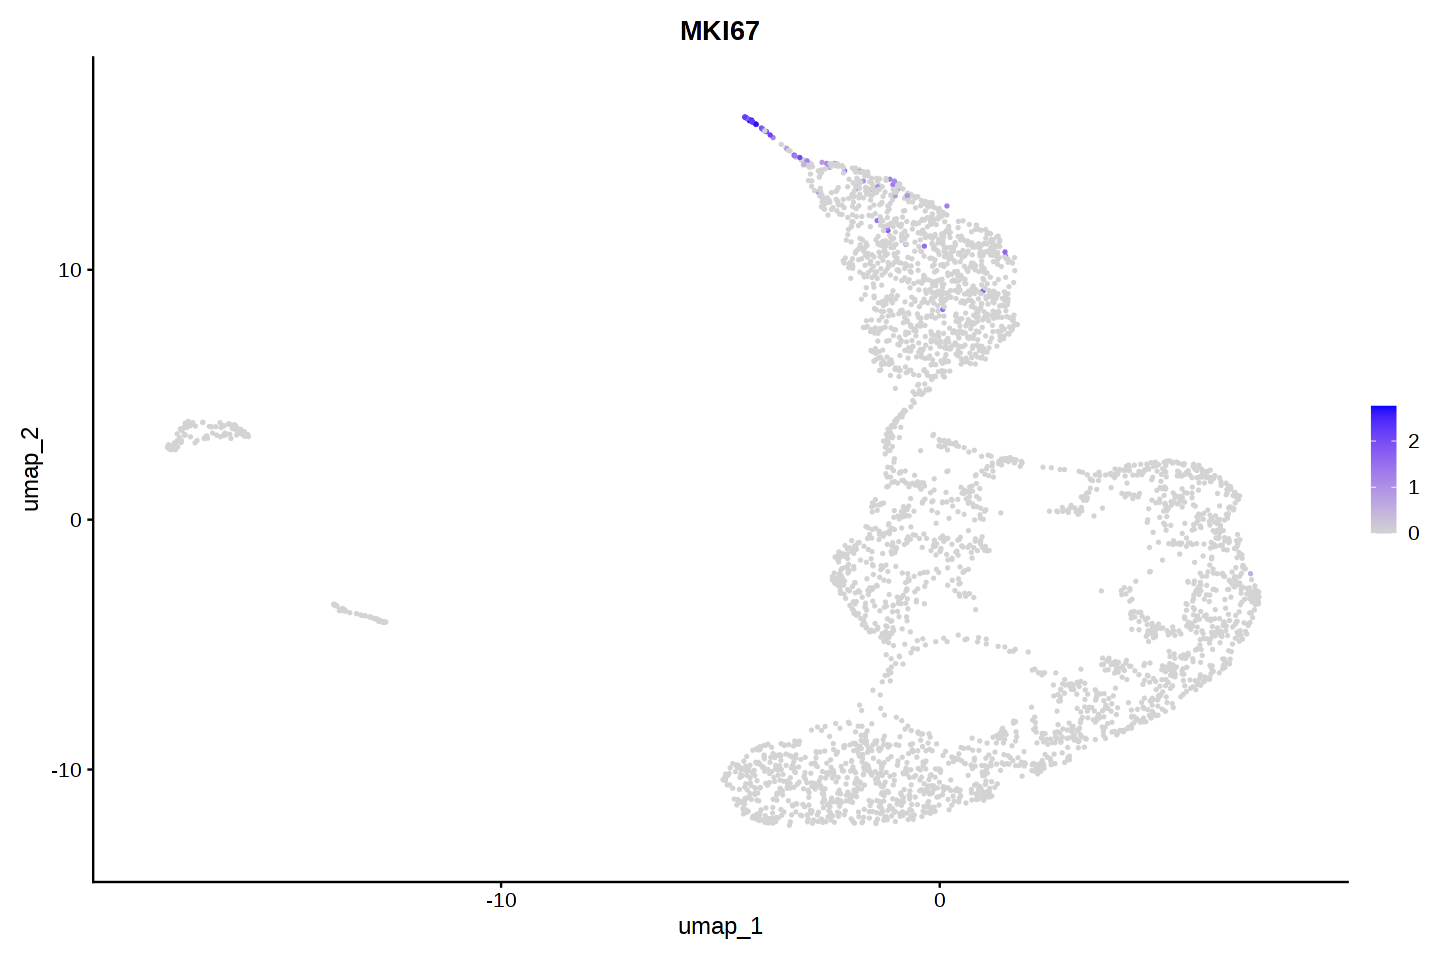

In [ ]:
# we will save this table to reuse in the future
cluster2vs5 %>%
  rownames_to_column(var = "gene") %>%
  write_csv(file = gzfile("GSM4339770_analysis/degs_c2_c5.csv.gz"))

plot1 = FeaturePlot(sampleA, features="MKI67")
print(plot1)

# Save plot
#ggsave("Figures/FeaturePlot_MKI67.png", plot = plot1)

 We can also find differentially expressed genes for all cluster using the function `FindAllMarkers`. When we are interested in markers we tipically focus in only possitive differentially expressed genes and usually stablish some characteristicas like minimal percentage of cells expressing a gene and logarithmic base 2 fold change, measure used to quantify the difference in expression levels of a gene between two conditions or groups in logarithmic scale.

In [ ]:
all_DEGs <- FindAllMarkers(sampleA, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 1.5)
cat("Top differentially expressed genes across all clusters:\n")
print(head(all_DEGs))

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6



Top differentially expressed genes across all clusters:
           p_val avg_log2FC pct.1 pct.2 p_val_adj cluster       gene
VMO1           0   3.143810 0.968 0.064         0       0       VMO1
AC026369.3     0   2.673002 0.948 0.062         0       0 AC026369.3
TREM1          0   3.095081 0.979 0.111         0       0      TREM1
PPIC           0   3.887852 0.911 0.050         0       0       PPIC
VSIG4          0   2.719658 0.966 0.106         0       0      VSIG4
MME            0   3.321298 0.872 0.022         0       0        MME


Now let's plot the expression of the top 5 differentially expressed genes per cluster.

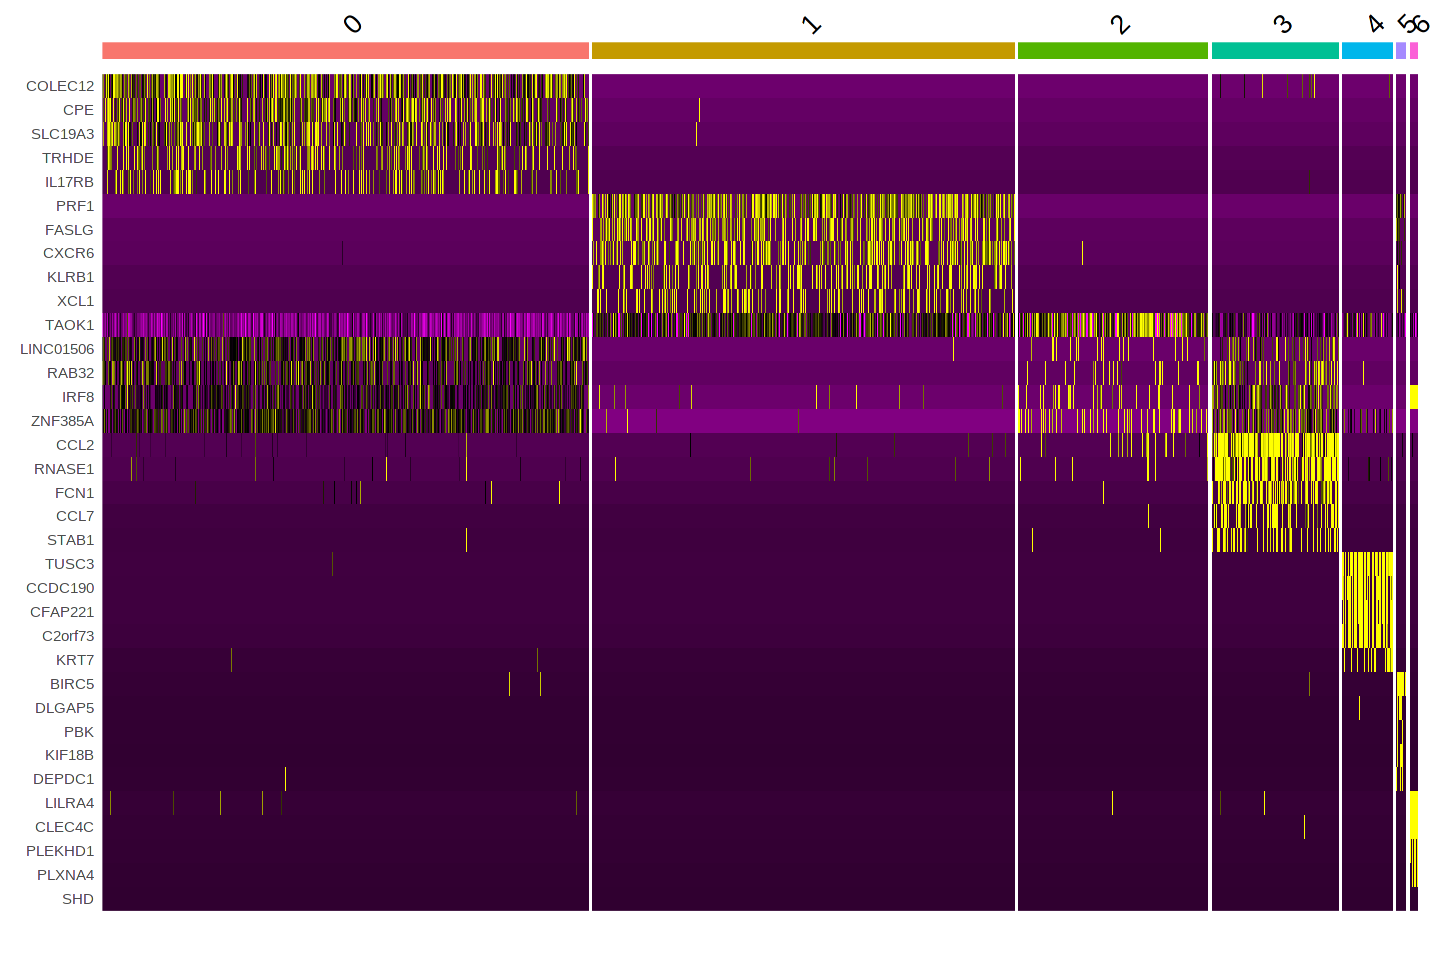

In [ ]:
topMarkers <- all_DEGs %>%
  group_by(cluster) %>%
  top_n(n=5, wt=avg_log2FC)

#png("Figures/top_markers_per_cluster.png")
DoHeatmap(sampleA, features = topMarkers$gene) + NoLegend()
#dev.off()

In [ ]:
all_DEGs[1:5,1:5]

p_val avg_log2FC pct.1 pct.2 p_val_adj
VMO1       0     3.143810   0.968 0.064 0        
AC026369.3 0     2.673002   0.948 0.062 0        
TREM1      0     3.095081   0.979 0.111 0        
PPIC       0     3.887852   0.911 0.050 0        
VSIG4      0     2.719658   0.966 0.106 0

In [ ]:
# Save results of differential expression
#write.csv(all_DEGs, file = gzfile("GSM4339770_analysis/GSM4339770_wilcox_DEGs.csv"), row.names=TRUE)

# **8. Annotating Cell Types**

Interpreting the results we get from single-cell data analysis can be pretty tricky. However, we can use statistical tools to help us with this. There exists some methods to compare our expression profiles with a reference dataset, so we can go deeper into what those clusters actually mean.

First, we will transform our data to a SingleCellExperiment class.

In [ ]:
# Convert Seurat object to SingleCellExperiment object and perform cell type annotation
sce <- as.SingleCellExperiment(sampleA)
# Add logcounts to SingleCellExperiment
logcounts(sce) <- as.matrix(GetAssayData(sampleA, layer = "data"))

Now we will use **celldex** package to load up a reference dataset that includes the cell types we expect to see in our samples, this package has several well-organized datasets that we can use. Most of these come from bulk RNA-Seq and microarray experiments, but they work fine for annotating single-cell datasets too. Here, we'll be using the **Blueprint** and **ENCODE** reference datasets to help us out, this are primarily focusing on blood-related cells and their differentiation stages, also captures the gene expression profiles of various immune cell types, such as T cells, B cells, and monocytes.

In [ ]:
# Load a reference dataset for cell type annotation
# You can use a reference from the celldex package, for example, the Human Primary Cell Atlas
if (!requireNamespace("celldex", quietly = TRUE)) {
  BiocManager::install("celldex")
}
ref <- BlueprintEncodeData()

Warning message in BlueprintEncodeData():
“'BlueprintEncodeData' is deprecated.
Use 'celldex::BlueprintEncodeData' instead.
See help("Deprecated")”


Now, we will use **SingleR()** function to annotate our data. This fuction requires the converted data to a SingleCellExperiment object, the reference dataset, and the labels from the reference dataset. It's inportant to know that this tool infer the cell type of each single cell independently, so we will see different groups to the ones we see in clustering.

In [ ]:
# Perform cell type annotation with SingleR using the loaded reference
annotations <- SingleR(test = sce, ref = ref, labels = ref$label.main)

# Add the cell type annotations to the Seurat object
sampleA$cell_type <- annotations$labels

# Display a table with the count of cells assigned to each cell type
cat("Cell type annotation counts:\n")
print(table(sampleA$cell_type))

Cell type annotation counts:

      Adipocytes          B-cells     CD4+ T-cells     CD8+ T-cells 
               4               41              126              942 
              DC Epithelial cells     Erythrocytes              HSC 
              34              120                4               25 
   Keratinocytes      Macrophages        Monocytes      Neutrophils 
               1             2065               68               13 
        NK cells 
             104 


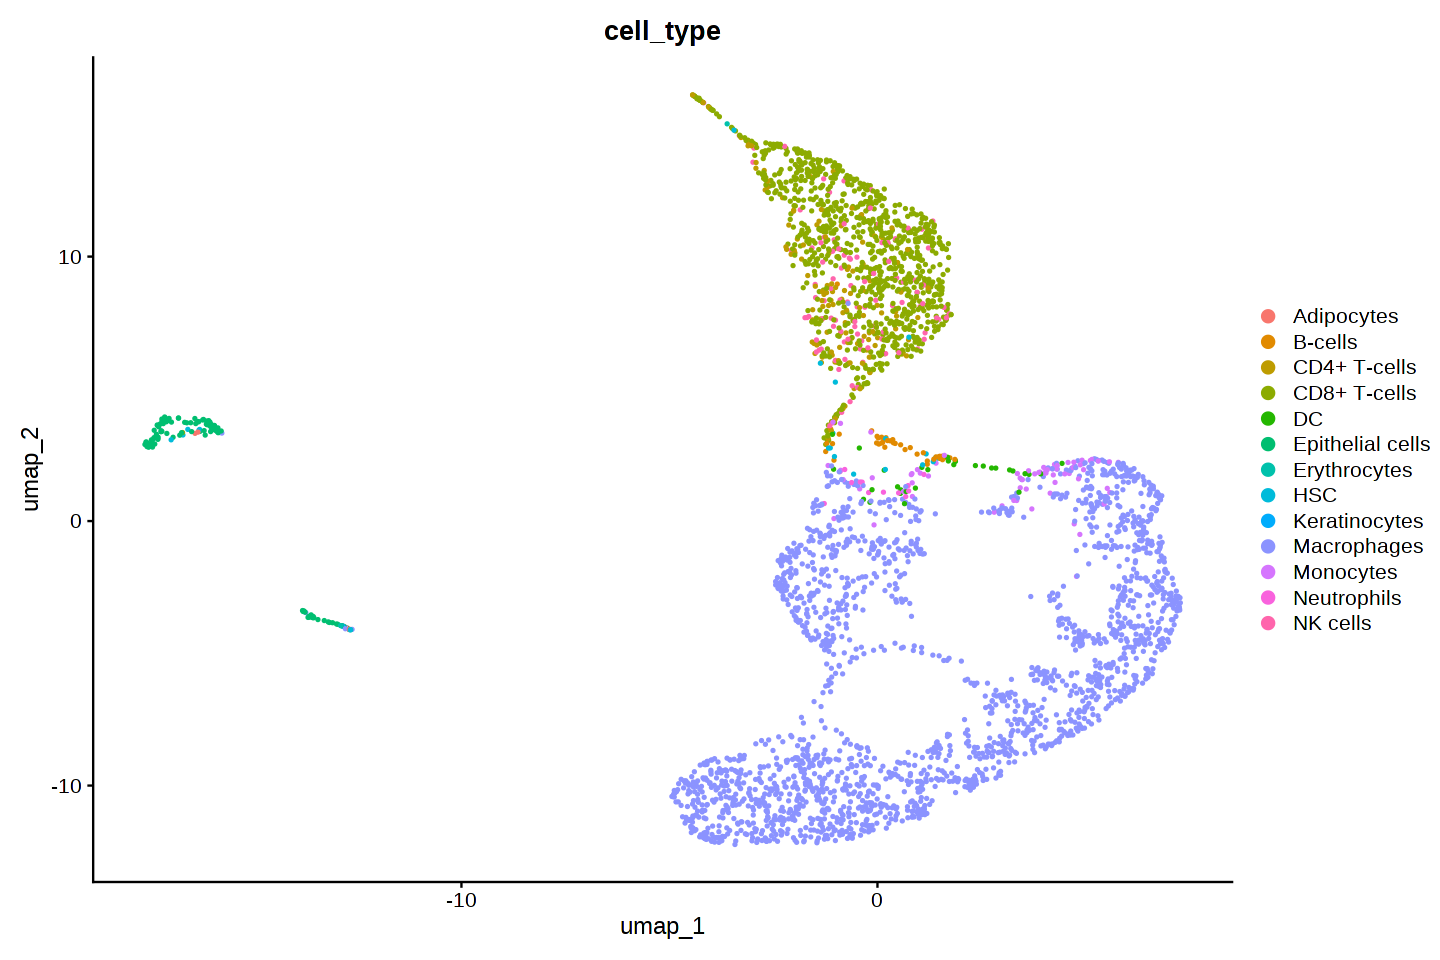

In [ ]:
# Visualize the annotated cell types
plot1 = DimPlot(sampleA, reduction = "umap", group.by = "cell_type")
print(plot1)
#ggsave("Figures/UMAP_annotation_SingleR.png", plot = plot1)

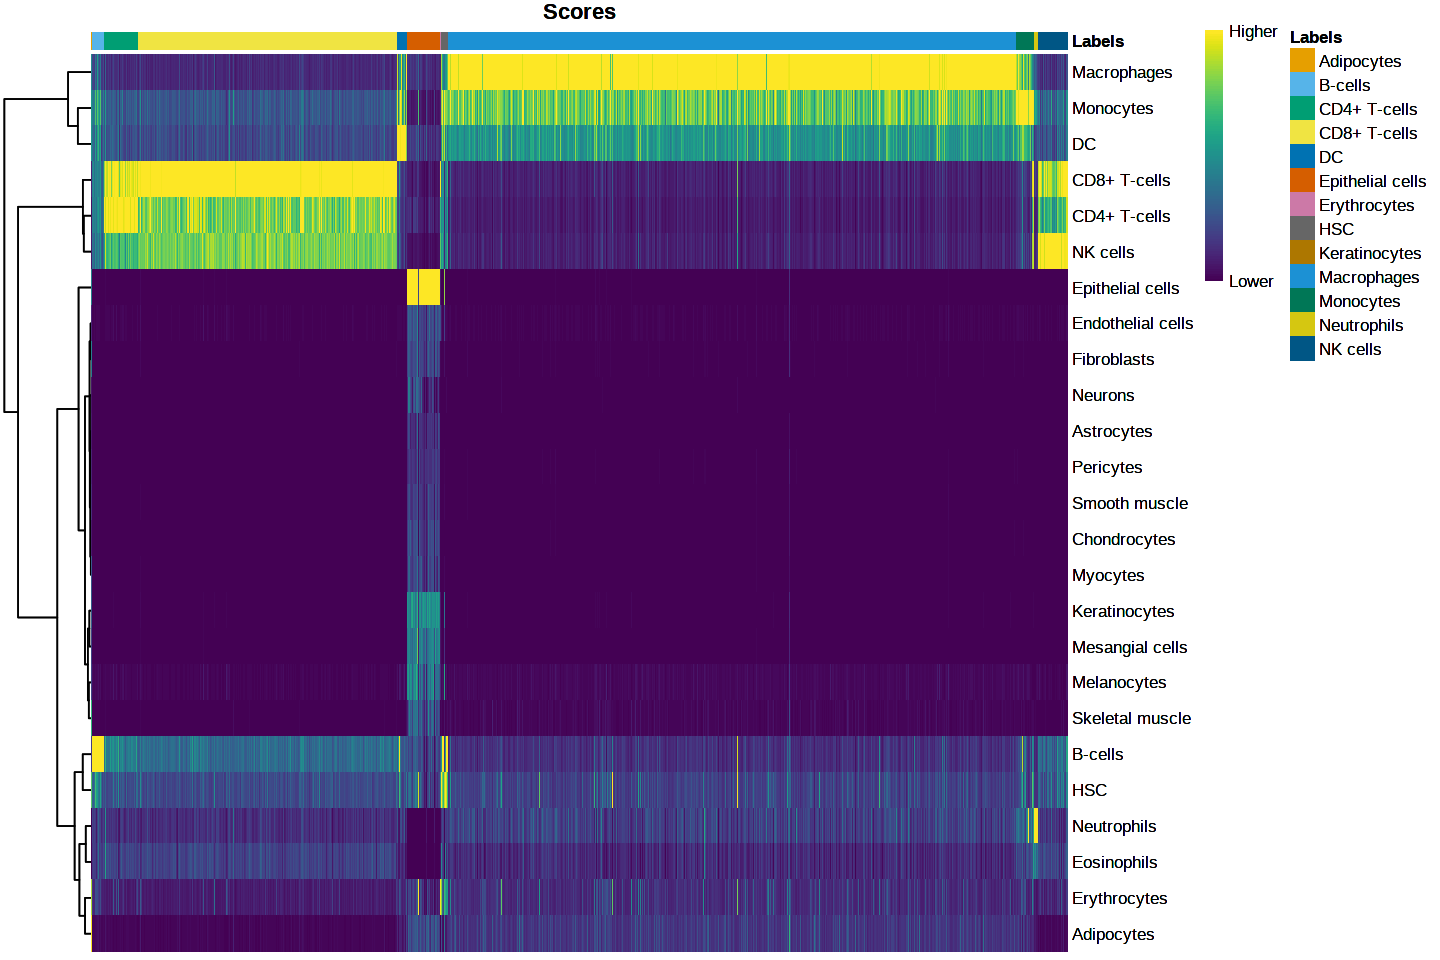

In [ ]:
# Generate a heatmap to visualize the assignment scores for each cell
plot1 = plotScoreHeatmap(annotations)
print(plot1)
#ggsave("Figures/Annotation_Scores_SingleR.png", plot = plot1)

We can create a table that crosses the assigned cell type labels with Seurat clusters to see how many cells coincide.

In [ ]:
my.table <- table(Assigned = annotations$pruned.labels, cluster = sce$RNA_snn_res.0.5)
print(my.table)

                  cluster
Assigned             0   1   2   3   4   5   6   7   8   9  10
  Adipocytes         0   0   0   0   0   0   0   0   4   0   0
  B-cells            0   0   0   0   0   0  27   0   0   0  14
  CD4+ T-cells       0   1   0   0   0 113   2   0   0   4   0
  CD8+ T-cells       0 696   0   0   0 174   3   0   0  20   0
  DC                 0   0   0   0  15   0  16   0   2   0   1
  Epithelial cells   0   0   0   0   0   0   1  88  30   0   0
  Erythrocytes       0   0   0   0   0   0   0   0   3   1   0
  HSC                0   0   0   1   0   1  10   3   3   0   7
  Keratinocytes      0   0   0   0   0   0   0   0   1   0   0
  Macrophages      847   0 475   7 279   0   0   0   1   0   0
  Monocytes          0   0   0   3  42   0  20   0   0   0   2
  Neutrophils        0   0   0   1   0   0  12   0   0   0   0
  NK cells           0  92   0   0   0   0   4   0   0   1   0


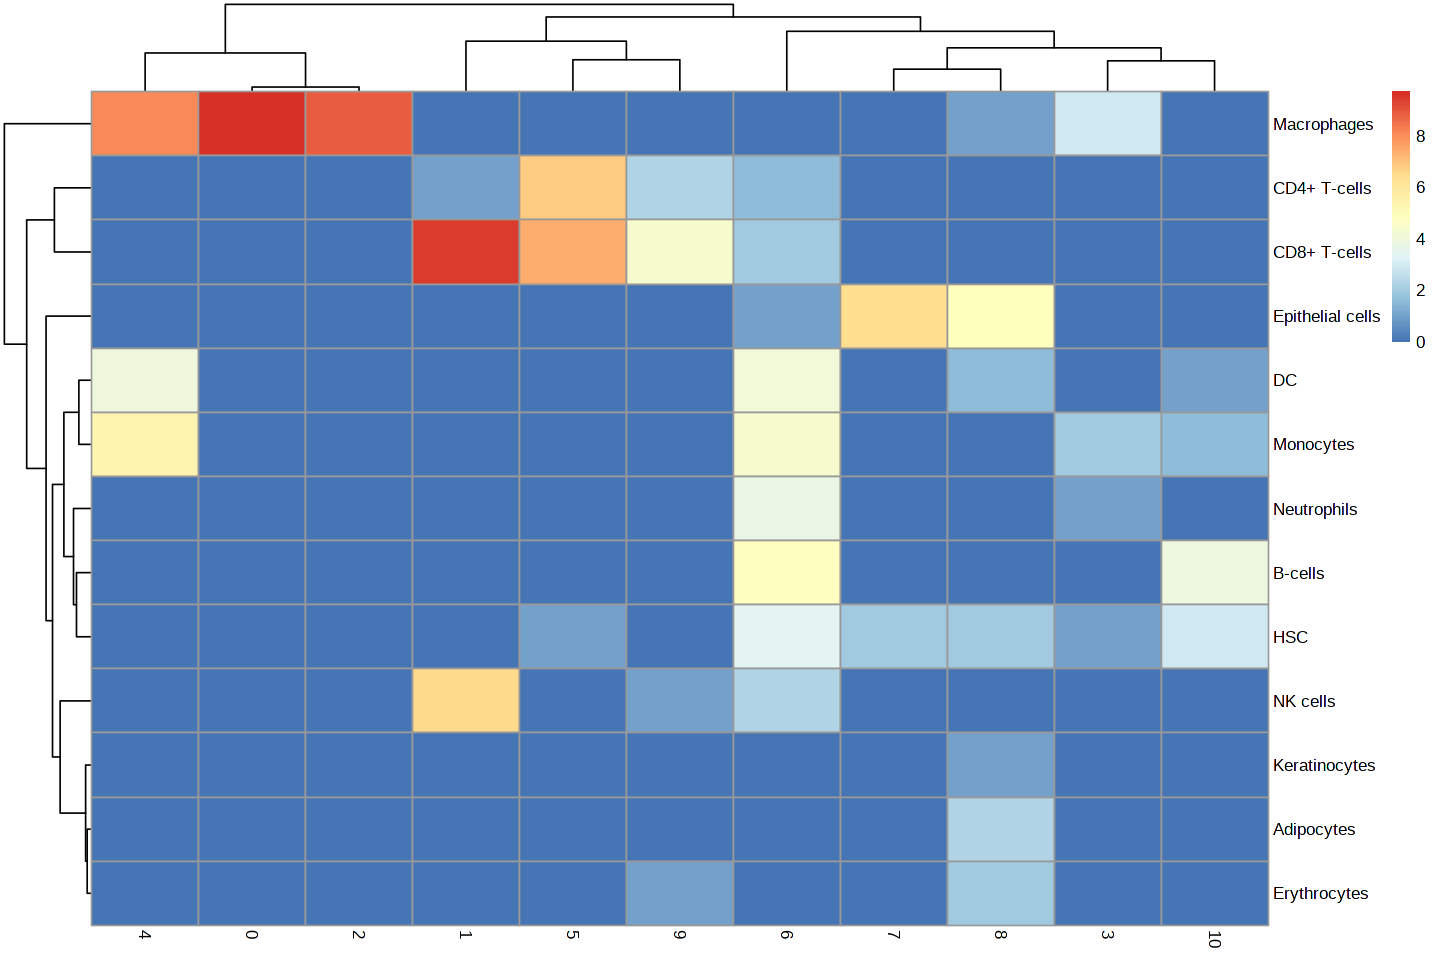

In [ ]:
# Generate a heatmap of the table, with log2 transformation to better visualize differences
#pdf("Figures/heatmap_log2_my_annotaion.pdf", width = 10, height = 8)  # Set dimensions as needed
pheatmap(log2(my.table + 1))
#dev.off()

In [ ]:
#saveRDS(sampleA, "GSM4339770_analysis/GSM4339770_annotated.rds")

# Do you want to run this code in R on your computer?

Although you can copy and paste the code, cell by cell, there is simpler way to do it. First, you will need to download this notebook in `.ipynb` format. To do this, click on **File** and then select **Download**. After that, open R and set the working directory to the location where the downloaded .ipynb notebook is saved. Next, load the `rmarkdown` library and use the `convert_ipynb` function, specifying both the downloaded Colab notebook and the desired location for the saved `.Rmd` file. This way, you will be able to run this code easily in R. Now, if you only need the code, you can extract it from the .Rmd file using the `knitr::purl` function, which generates a `.R` script.

```
# Set environment
setwd("C:/Users/Administrator/Documents/Jaguar/Curso_scRNAseq_Medellín")

# Libraries
library(rmarkdown)

# Colab to .Rmd in R
convert_ipynb("scRNASeq_07_10_2024.ipynb", "scRNASeq_07_10_2024.Rmd")

# Pass .Rmd to .R
knitr::purl("scRNASeq_07_10_2024.Rmd")
```



> # **Activities**

# Activity 1 : Exploring Differential Gene Expression Analysis Methods



This line identifies differentially expressed genes (DEGs) across all clusters using the `FindAllMarkers` function in Seurat.
By default, Seurat uses the Wilcoxon Rank Sum test to identify DEGs. The function is set to only return positive markers
(genes that are more highly expressed in the cluster of interest compared to others). The `min.pct` parameter filters out
genes that are not detected in at least 25% of cells in any cluster, and `logfc.threshold` excludes genes with a logarithmic fold change below 1.5.

Other methods for DEG analysis can also be applied in Seurat, such as the likelihood-ratio test ('bimod'), DESeq2 ('DESeq2'), or t-test ('t'). For example, add test.use = 'bimod'

`all_DEGs <- FindAllMarkers(sampleA, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 1.5, test.use = '')`




In [ ]:
# all_DEGs_t_test <- FindAllMarkers(sampleA, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 1.5)

## Task 1: Modify the Method - t-test


Now, modify the code to use the t-test instead of the Wilcoxon. Run the code and compare the results to Task 1.
What differences do you observe in the top DEGs?

## Task 2: Explore DESeq2 Method

Next, try using the DESeq2 method for DEG analysis. How do the results compare to the previous methods?
Are there any significant differences in the identified DEGs? Remember to install the [DESeq2 ](https://bioconductor.org/packages/release/bioc/html/DESeq2.html)package if it is not already installed.


In [ ]:
#all_DEGs_DESeq2 <- FindMarkers(sampleA, ident.1 = "0", ident.2 = "1", test.use = 'DESeq2', min.pct = 0.25, logfc.threshold = 0)
#head(all_DEGs_DESeq2)

# Activity 2 : Differential Gene Expression Analysis with PBMC Data

In this activity, you'll work with PBMC single-cell RNA-seq data from SeuratData. These reference data (pbmc3k) are commonly used to demonstrate single-cell RNA-seq workflows. You'll explore the data, perform quality control, normalize, scale, identify and remove doublets, and annotate cell types before identifying differentially expressed genes across clusters.



## 1. Load and Explore the Data:

Install and load the pbmc3k dataset using SeuratData.
Explore the data to understand the structure of the count matrix.

In [ ]:
library("SeuratData") #data reference PBMC
AvailableData()
# Load the PBMC dataset
InstallData("pbmc3k")
pbmc <- UpdateSeuratObject(pbmc3k)

Dataset         Version
adiposeref.SeuratData      adiposeref      1.0.0  
bmcite.SeuratData          bmcite          0.3.0  
bonemarrowref.SeuratData   bonemarrowref   1.0.0  
cbmc.SeuratData            cbmc            3.1.4  
celegans.embryo.SeuratData celegans.embryo 0.1.0  
fetusref.SeuratData        fetusref        1.0.0  
hcabm40k.SeuratData        hcabm40k        3.0.0  
heartref.SeuratData        heartref        1.0.0  
humancortexref.SeuratData  humancortexref  1.0.0  
ifnb.SeuratData            ifnb            3.1.0  
kidneyref.SeuratData       kidneyref       1.0.2  
lungref.SeuratData         lungref         2.0.0  
mousecortexref.SeuratData  mousecortexref  1.0.0  
panc8.SeuratData           panc8           3.0.2  
pancreasref.SeuratData     pancreasref     1.0.0  
pbmc3k.SeuratData          pbmc3k          3.1.4  
pbmcMultiome.SeuratData    pbmcMultiome    0.1.4  
pbmcref.SeuratData         pbmcref         1.0.0  
pbmcsca.SeuratData         pbmcsca         3.0.0  
ssHippo.SeuratData         ssHippo         3.1.4  
stxBrain.SeuratData        stxBrain        0.1.2  
stxKidney.SeuratData       stxKidney       0.1.0  
thp1.eccite.SeuratData     thp1.eccite     3.1.5  
tonsilref.SeuratData       tonsilref       2.0.0  
                           Summary                                                       
adiposeref.SeuratData      Azimuth Reference: adipose                                    
bmcite.SeuratData          30k Bone Marrow Cells                                         
bonemarrowref.SeuratData   Azimuth Reference: bonemarrow                                 
cbmc.SeuratData            scRNAseq and 13-antibody sequencing of CBMCs                  
celegans.embryo.SeuratData 6k C. elegans embryos from Packer and Zhu et al (2019)        
fetusref.SeuratData        Azimuth Reference: fetus                                      
hcabm40k.SeuratData        40,000 Cells From the Human Cell Atlas ICA Bone Marrow Dataset
heartref.SeuratData        Azimuth Reference: heart                                      
humancortexref.SeuratData  Azimuth Reference: humancortex                                
ifnb.SeuratData            IFNB-Stimulated and Control PBMCs                             
kidneyref.SeuratData       Azimuth Reference: kidney                                     
lungref.SeuratData         Azimuth Reference: lung                                       
mousecortexref.SeuratData  Azimuth Reference: mousecortex                                
panc8.SeuratData           Eight Pancreas Datasets Across Five Technologies              
pancreasref.SeuratData     Azimuth Reference: pancreas                                   
pbmc3k.SeuratData          3k PBMCs from 10X Genomics                                    
pbmcMultiome.SeuratData    10X Genomics PBMC Multiome Dataset                            
pbmcref.SeuratData         Azimuth Reference: pbmc                                       
pbmcsca.SeuratData         Broad Institute PBMC Systematic Comparative Analysis          
ssHippo.SeuratData         Slide-seq v2 dataset of mouse hippocampus                     
stxBrain.SeuratData        10X Genomics Visium Mouse Brain Dataset                       
stxKidney.SeuratData       10X Genomics Visium Mouse Kidney Dataset                      
thp1.eccite.SeuratData     ECCITE-seq THP-1                                              
tonsilref.SeuratData       Azimuth Reference: tonsil                                     
                           species    system            ncells
adiposeref.SeuratData      human      adipose           160075
bmcite.SeuratData          human      bone marrow        30672
bonemarrowref.SeuratData   human      bonemarrow        297627
cbmc.SeuratData            human      CBMC (cord blood)   8617
celegans.embryo.SeuratData C. elegans embryo              6188
fetusref.SeuratData        human      fetus             377456
hcabm40k.SeuratData        human      bone marrow        4000

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay ‘RNA’

Object representation is consistent with the most current Seurat version



In [ ]:
# Data exploration
data_counts_pbmc3k <- as.matrix(pbmc@assays$RNA@counts)
dim(data_counts_pbmc3k)

[1] 13714  2700

Continue ...

## 2. Quality Control (QC)




Calculate the percentage of mitochondrial genes per cell.
Perform QC by visualizing RNA features (nFeature_RNA, nCount_RNA) and mitochondrial content.

Remember to check the class of the `pbmc` object. If the object is already a Seurat object, you can proceed directly with the quality control (QC) steps without needing to create a new Seurat object. This is often the case with datasets like `pbmc3k`, which are pre-formatted for Seurat.


Use scDblFinder to identify and remove doublets before dimensionality reduction.

## 3. Normalize the data

## 4.  Identify variable genes

 identify the top variable genes and scale the data.

## 5. Dimensionality Reduction and Clustering

Perform PCA, followed by UMAP for visualization. Use FindNeighbors and FindClusters to cluster the cells.

## 6. Differential Expression

Identify differentially expressed genes across clusters using the Wilcoxon test.

In [ ]:
#install.packages('devtools')
#devtools::install_github('immunogenomics/presto')

## 7. Cell Type Annotation

Annotate cell types using SingleR with a reference dataset.
Visualize the annotated cell types on a UMAP plot.

# **Workshop Summary**

In this workshop, we worked with a single-cell RNA-seq (scRNA-seq) dataset from GEO, creating a Seurat object to efficiently organize and manage the data. We performed quality control (QC) to filter out low-quality cells, ensuring we had high-quality data for analysis. We identified variable genes that significantly contribute to the variability in the dataset, allowing us to focus on the most informative genes for our analysis. The data was then normalized and scaled to make expression levels comparable across cells.

Next, we applied PCA and UMAP for dimensionality reduction, simplifying the data for easier visualization and interpretation. We demonstrated how to perform clustering to group similar cells based on their gene expression profiles and identified differentially expressed genes (DEGs) across clusters using the Wilcoxon Rank Sum test. As an exercise we propossed to explore alternative methods, such as the t-test and DESeq. Finally, we utilized SingleR for cell type annotation, giving biological context to our clusters. Throughout the workshop, we incorporated various visualizations to enhance our understanding and interpretation of the dataset.

We hope you enjoyed the workshop! Continue exploring these methods and try applying them to other datasets. The skills you have gained here are versatile and can be adapted to different challenges.

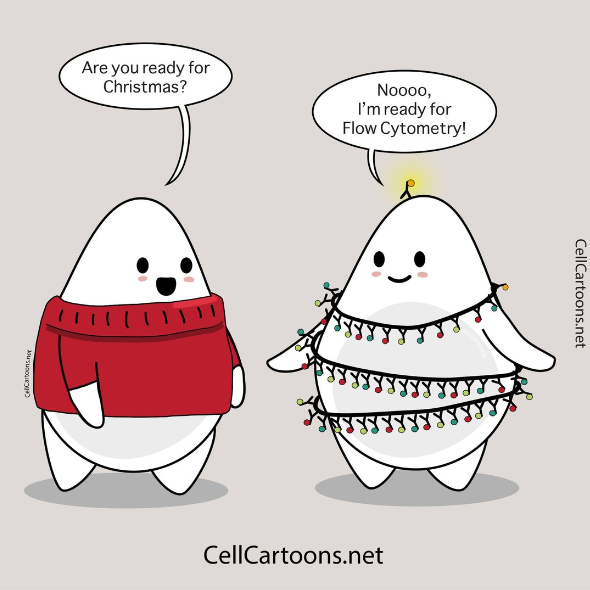

[Image taken from Cell Cartoons](https://www.instagram.com/cellcartoons/)